In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
mainpath = 'C:\data'
filename = 'data_uvaS.csv'
fullpath = os.path.join(mainpath,filename)
data = pd.read_csv(fullpath,sep=';')
data

,pH,°C,°Brix,Clase
0,"2,94","21,00","17,60",Borgoña
1,"3,13","22,10","18,20",Borgoña
2,"3,27","21,50","19,00",Borgoña
3,"3,25","21,20","20,20",Borgoña
4,"3,13","21,70","18,40",Borgoña
...,...,...,...,...
195,"3,11","21,5","11,8",Italia
196,"3,05","20,9","11,9",Italia
197,"3,36","20,8","13,0",Italia
198,"3,25","20,7","12,1",Italia


# TRANSFORMACIONES/PREPROCESAMIENTO DEPENDIENTES E INDEPENDIENTES

# Savitzky-Golay 

In [3]:
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.signal import savgol_filter
from sklearn.preprocessing import StandardScaler

In [4]:
# Paso 1: Convertir la columna '°Brix' en números
data['°Brix'] = data['°Brix'].str.replace(',', '.').astype(float)

In [5]:
# Aplicar una transformación logarítmica solo a valores positivos
data['Dependent_Variable_Log'] = data['°Brix'].apply(lambda x: np.log(x) if x > 0 else 0)

In [6]:
# Paso 2: Transformación de la Variable Dependiente
data['Dependent_Variable_Log'] = np.log(data['°Brix'])
data['Dependent_Variable_SquareRoot'] = np.sqrt(data['°Brix'])
data['Dependent_Variable_Squared'] = data['°Brix'] ** 2

In [7]:
# Eliminar las comas de la columna '°Brix' y convertir a números decimales
data['pH'] = data['pH'].str.replace(',', '.').astype(float)
data['°C'] = data['°C'].str.replace(',', '.').astype(float)

In [8]:
# Paso 3: Filtrado de Variables Independientes con Savitzky-Golay (SG)
window_size = 7
poly_order = 2

data['Filtered_pH'] = savgol_filter(data['pH'], window_size, poly_order)
data['Filtered_Temperature'] = savgol_filter(data['°C'], window_size, poly_order)


In [9]:
# Paso 4: Transformación de Variables Independientes Filtradas
data['Transformed_pH_Log'] = np.log(data['Filtered_pH'])
data['Transformed_Temperature_Log'] = np.log(data['Filtered_Temperature'])
data['First_Derivative_pH'] = np.gradient(data['Filtered_pH'])
data['First_Derivative_Temperature'] = np.gradient(data['Filtered_Temperature'])

In [10]:
# Paso 5: Preprocesamiento de Variables Independientes Transformadas
scaler = StandardScaler()
# Implementar Transformación Normal Estándar (SNV)
data['SNV_Transformed_pH'] = scaler.fit_transform(data[['Transformed_pH_Log']])
data['SNV_Transformed_Temperature'] = scaler.fit_transform(data[['Transformed_Temperature_Log']])

In [11]:
# Implementar la Corrección de Dispersión Múltiple (MSC)
# Calcular el espectro de referencia
mean_spectrum = data[['Transformed_pH_Log', 'Transformed_Temperature_Log']].mean()

# Aplicar MSC a las variables independientes transformadas
data['MSC_Transformed_pH'] = data['Transformed_pH_Log'] - mean_spectrum['Transformed_pH_Log']
data['MSC_Transformed_Temperature'] = data['Transformed_Temperature_Log'] - mean_spectrum['Transformed_Temperature_Log']


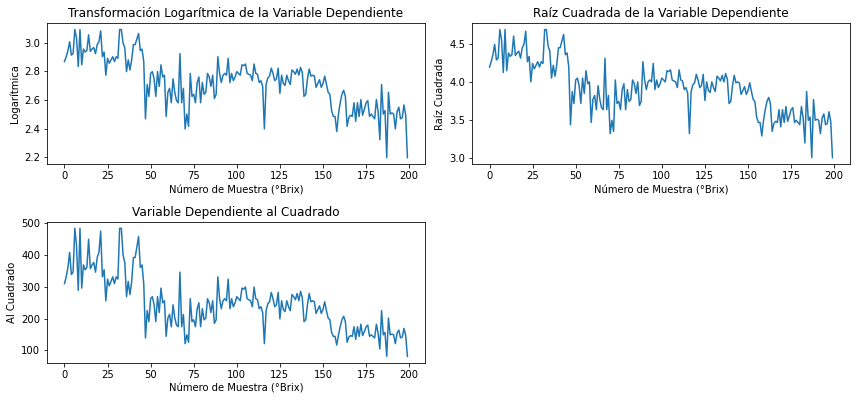

In [12]:

# Crear una figura con varios subgráficos
plt.figure(figsize=(12, 8))

# Gráfico de la transformación logarítmica de la variable dependiente
plt.subplot(321)
plt.plot(data.index, data['Dependent_Variable_Log'])
plt.title('Transformación Logarítmica de la Variable Dependiente')
plt.xlabel('Número de Muestra (°Brix)')
plt.ylabel('Logarítmica')

# Gráfico de la raíz cuadrada de la variable dependiente
plt.subplot(322)
plt.plot(data.index, data['Dependent_Variable_SquareRoot'])
plt.title('Raíz Cuadrada de la Variable Dependiente')
plt.xlabel('Número de Muestra (°Brix)')
plt.ylabel('Raíz Cuadrada')

# Gráfico de la variable dependiente al cuadrado
plt.subplot(323)
plt.plot(data.index, data['Dependent_Variable_Squared'])
plt.title('Variable Dependiente al Cuadrado')
plt.xlabel('Número de Muestra (°Brix)')
plt.ylabel('Al Cuadrado')

# Mostrar los gráficos
plt.tight_layout()
plt.show()

In [13]:
data

,pH,°C,°Brix,Clase,Dependent_Variable_Log,Dependent_Variable_SquareRoot,Dependent_Variable_Squared,Filtered_pH,Filtered_Temperature,Transformed_pH_Log,Transformed_Temperature_Log,First_Derivative_pH,First_Derivative_Temperature,SNV_Transformed_pH,SNV_Transformed_Temperature,MSC_Transformed_pH,MSC_Transformed_Temperature
0,2.94,21.0,17.6,Borgoña,2.867899,4.195235,309.76,3.038333,21.316667,1.111309,3.059489,0.045952,0.161905,-0.292668,0.350480,-0.030718,0.015103
1,3.13,22.1,18.2,Borgoña,2.901422,4.266146,331.24,3.084286,21.478571,1.126320,3.067056,0.044762,0.127381,-0.149651,0.526071,-0.015707,0.022669
2,3.27,21.5,19.0,Borgoña,2.944439,4.358899,361.00,3.127857,21.571429,1.140348,3.071370,0.042381,0.058333,-0.015998,0.626181,-0.001679,0.026983
3,3.25,21.2,20.2,Borgoña,3.005683,4.494441,408.04,3.169048,21.595238,1.153431,3.072473,0.010357,-0.069048,0.108650,0.651781,0.011404,0.028086
4,3.13,21.7,18.4,Borgoña,2.912351,4.289522,338.56,3.148571,21.433333,1.146949,3.064947,0.027143,-0.116667,0.046890,0.477143,0.004922,0.020561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,3.11,21.5,11.8,Italia,2.468100,3.435113,139.24,3.168571,21.190476,1.153281,3.053552,0.061667,-0.219048,0.107218,0.212696,0.011254,0.009165
196,3.05,20.9,11.9,Italia,2.476538,3.449638,141.61,3.263810,20.876190,1.182895,3.038609,0.018929,-0.159524,0.389368,-0.134065,0.040868,-0.005777
197,3.36,20.8,13.0,Italia,2.564949,3.605551,169.00,3.206429,20.871429,1.165158,3.038381,-0.090833,0.054762,0.220375,-0.139359,0.023130,-0.006005
198,3.25,20.7,12.1,Italia,2.493205,3.478505,146.41,3.082143,20.985714,1.125625,3.043842,-0.157738,0.173810,-0.156272,-0.012635,-0.016402,-0.000544


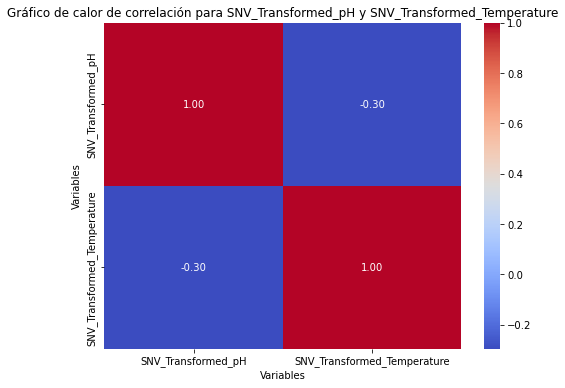

In [14]:
# Seleccionar las dos variables de interés
variables = data[['SNV_Transformed_pH', 'SNV_Transformed_Temperature']]

# Calcular la matriz de correlación para las dos variables
correlation_matrix = variables.corr()

# Crear el gráfico de calor
plt.figure(figsize=(8, 6))  # Ajusta el tamaño de la figura según tus preferencias
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Agregar etiquetas a los ejes
plt.xlabel("Variables")
plt.ylabel("Variables")
plt.title("Gráfico de calor de correlación para SNV_Transformed_pH y SNV_Transformed_Temperature")

# Mostrar el gráfico
plt.show()

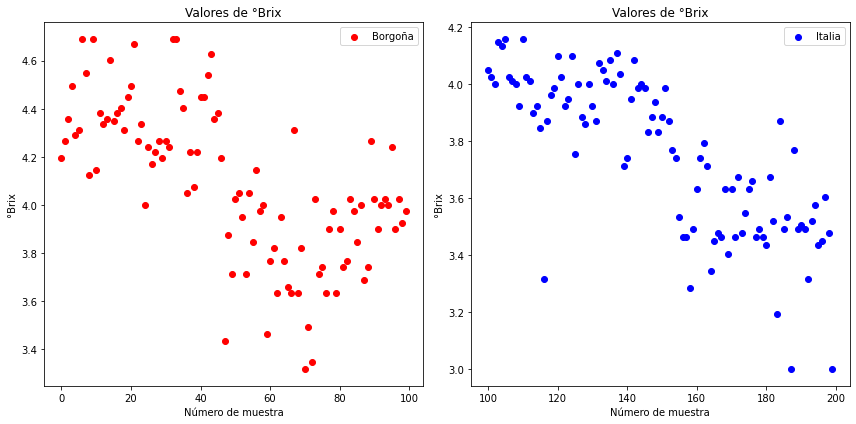

In [15]:
import matplotlib.pyplot as plt

# Filtra los datos para la categoría "Borgoña"
data_borgona = data[data['Clase'] == 'Borgoña']

# Filtra los datos para la categoría "Italia"
data_italia = data[data['Clase'] == 'Italia']

# Crea las gráficas para "Borgoña" y "Italia"
plt.figure(figsize=(12, 6))  # Tamaño de la figura

# Gráfica para "Borgoña"
plt.subplot(1, 2, 1)  # Subplot 1
plt.scatter(data_borgona.index, data_borgona['Dependent_Variable_SquareRoot'], label='Borgoña', color='red')
plt.title('Valores de °Brix')
plt.xlabel('Número de muestra')
plt.ylabel('°Brix')
plt.legend()

# Gráfica para "Italia"
plt.subplot(1, 2, 2)  # Subplot 2
plt.scatter(data_italia.index, data_italia['Dependent_Variable_SquareRoot'], label='Italia', color='blue')
plt.title('Valores de °Brix')
plt.xlabel('Número de muestra')
plt.ylabel('°Brix')
plt.legend()

plt.tight_layout()  # Ajustar automáticamente los subplots
plt.show()

# Análisis de componentes principales (PCA)

In [16]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [17]:
X_cols = ['SNV_Transformed_pH', 'SNV_Transformed_Temperature']

In [18]:
ss = StandardScaler()

In [19]:
data[X_cols] = ss.fit_transform(data[X_cols])

In [20]:
pca = PCA (n_components=2,random_state=42)

In [21]:
pca2 = pca.fit_transform(data[X_cols])

In [22]:
df2 = pd.DataFrame({'PCA1':pca2[:,0], 'PCA2':pca2[:,1],'Clase':data['Clase']})

In [23]:
df2

,PCA1,PCA2,Clase
0,-0.454774,-0.040880,Borgoña
1,-0.477807,-0.266169,Borgoña
2,-0.454089,-0.431465,Borgoña
3,-0.384052,-0.537706,Borgoña
4,-0.304235,-0.370547,Borgoña
...,...,...,...
195,-0.074584,-0.226213,Italia
196,0.370123,-0.180527,Italia
197,0.254371,-0.057287,Italia
198,-0.101567,0.119436,Italia


In [24]:
pca.explained_variance_ratio_

array([0.64777188, 0.35222812])

In [25]:
pca.explained_variance_ratio_.sum()

1.0

<AxesSubplot:>

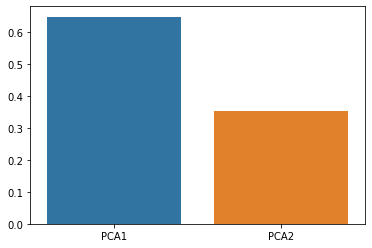

In [26]:
sns.barplot(x=['PCA1','PCA2'], y=pca.explained_variance_ratio_)

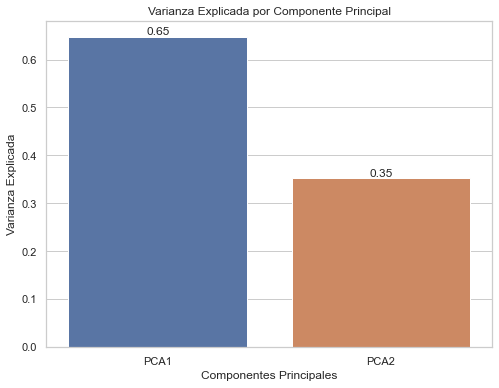

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Datos de ejemplo
x = ['PCA1', 'PCA2']
y = pca.explained_variance_ratio_

# Crear el gráfico de barras
sns.set(style='whitegrid')
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=x, y=y)

# Agregar etiquetas a las barras
for i, v in enumerate(y):
    ax.text(i, v, f'{v:.2f}', ha='center', va='bottom')

# Personalizar el gráfico
plt.xlabel('Componentes Principales')
plt.ylabel('Varianza Explicada')
plt.title('Varianza Explicada por Componente Principal')

# Mostrar el gráfico
plt.show()


In [28]:
df2['Brix'] = data['Dependent_Variable_SquareRoot']

In [29]:
df2

,PCA1,PCA2,Clase,Brix
0,-0.454774,-0.040880,Borgoña,4.195235
1,-0.477807,-0.266169,Borgoña,4.266146
2,-0.454089,-0.431465,Borgoña,4.358899
3,-0.384052,-0.537706,Borgoña,4.494441
4,-0.304235,-0.370547,Borgoña,4.289522
...,...,...,...,...
195,-0.074584,-0.226213,Italia,3.435113
196,0.370123,-0.180527,Italia,3.449638
197,0.254371,-0.057287,Italia,3.605551
198,-0.101567,0.119436,Italia,3.478505


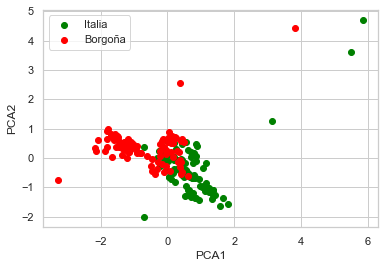

In [30]:
import matplotlib.pyplot as plt

# Supongamos que tienes un DataFrame llamado df2

# Dividir los datos en dos grupos basados en la clase
italia_data = df2[df2['Clase'] == 'Italia']
borgona_data = df2[df2['Clase'] == 'Borgoña']

# Crear un gráfico de dispersión
plt.scatter(italia_data['PCA1'], italia_data['PCA2'], c='green', label='Italia')
plt.scatter(borgona_data['PCA1'], borgona_data['PCA2'], c='red', label='Borgoña')

# Etiquetas y leyenda
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()

# Mostrar el gráfico
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

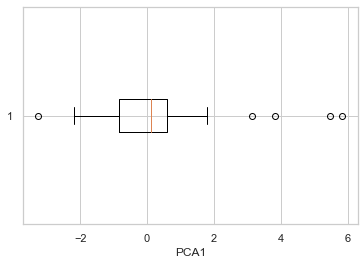

In [31]:
plt.boxplot(df2['PCA1'], vert=False)
plt.xlabel('PCA1')
plt.show

In [32]:
Q1 = df2['PCA1'].quantile(0.25)
print("Primer Quartil",Q1)
Q3 = df2['PCA1'].quantile(0.75)
print("Tercer Quartil",Q3)
IQR = Q3 - Q1
print("Rango Intercuartil",IQR)

Mediana = df2['PCA1'].median()
print("Mediana",Mediana)
Valor_Minimo = df2['PCA1'].min()
print("Valor Minimo",Valor_Minimo)
Valor_Maximo = df2['PCA1'].max()
print("Valor Máximo",Valor_Maximo)

Primer Quartil -0.8295075637522157
Tercer Quartil 0.6091773434659737
Rango Intercuartil 1.4386849072181893
Mediana 0.12108337030432717
Valor Minimo -3.2591961964912017
Valor Máximo 5.843713195098101


In [33]:
BI_Calculado = (Q1 - 1.5 * IQR)
print("BI_Calculado \n",BI_Calculado)
BS_Calculado = (Q3 + 1.5 * IQR)
print("BS_Calculado \n",BS_Calculado)

BI_Calculado 
 -2.9875349245794998
BS_Calculado 
 2.767204704293258


In [34]:
ubicacion_utliers = (df2['PCA1'] < BI_Calculado) | df2['PCA1'] > BS_Calculado
print("\n Ubicación de Outliers \n", ubicacion_utliers)


 Ubicación de Outliers 
 0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Name: PCA1, Length: 200, dtype: bool


In [35]:
outliers = df2[ubicacion_utliers]
print("\n Lista de Outliers \n", outliers)


 Lista de Outliers 
 Empty DataFrame
Columns: [PCA1, PCA2, Clase, Brix]
Index: []


In [36]:
Outliers_Ordenados = outliers.sort_values("PCA1")
Outliers_Ordenados

,PCA1,PCA2,Clase,Brix


In [37]:
ubicacion_sin_out = (df2['PCA1'] >= BI_Calculado) & (df2['PCA1'] <= BS_Calculado)
sin_outliers = df2[ubicacion_sin_out]
ubicacion_sin_out

0      True
1      True
2      True
3      True
4      True
       ... 
195    True
196    True
197    True
198    True
199    True
Name: PCA1, Length: 200, dtype: bool

<function matplotlib.pyplot.show(close=None, block=None)>

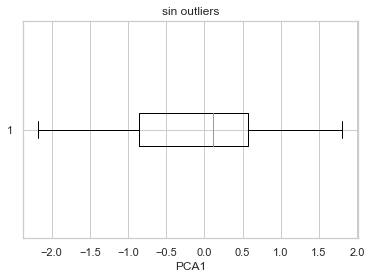

In [38]:
plt.title("sin outliers")
plt.boxplot(sin_outliers["PCA1"], vert=False)
plt.xlabel('PCA1')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

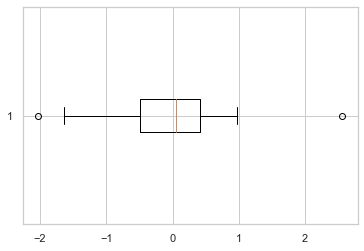

In [39]:
plt.boxplot(sin_outliers['PCA2'], vert=False)
plt.show

In [40]:
Q1 = sin_outliers['PCA2'].quantile(0.25)
print("Primer Quartil",Q1)
Q3 = sin_outliers['PCA2'].quantile(0.75)
print("Tercer Quartil",Q3)
IQR = Q3 - Q1
print("Rango Intercuartil",IQR)

Mediana = sin_outliers['PCA2'].median()
print("Mediana",Mediana)
Valor_Minimo = sin_outliers['PCA2'].min()
print("Valor Minimo",Valor_Minimo)
Valor_Maximo = sin_outliers['PCA2'].max()
print("Valor Máximo",Valor_Maximo)

Primer Quartil -0.4947429824495461
Tercer Quartil 0.40984301501483045
Rango Intercuartil 0.9045859974643766
Mediana 0.04994136532372652
Valor Minimo -2.0293533895953524
Valor Máximo 2.560704431954985


In [41]:
BI_Calculado = (Q1 - 1.5 * IQR)
print("BI_Calculado \n",BI_Calculado)
BS_Calculado = (Q3 + 1.5 * IQR)
print("BS_Calculado \n",BS_Calculado)

BI_Calculado 
 -1.851621978646111
BS_Calculado 
 1.7667220112113953


In [42]:
ubicacion_utliers = (sin_outliers['PCA2'] < BI_Calculado) | sin_outliers['PCA2'] > BS_Calculado
print("\n Ubicación de Outliers \n", ubicacion_utliers)


 Ubicación de Outliers 
 0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Name: PCA2, Length: 195, dtype: bool


In [43]:
outliers = sin_outliers[ubicacion_utliers]
print("\n Lista de Outliers \n", outliers)


 Lista de Outliers 
 Empty DataFrame
Columns: [PCA1, PCA2, Clase, Brix]
Index: []


In [44]:
Outliers_Ordenados = outliers.sort_values("PCA2")
Outliers_Ordenados

,PCA1,PCA2,Clase,Brix


In [45]:
ubicacion_sinOut = (sin_outliers['PCA2'] >= BI_Calculado) & (sin_outliers['PCA2'] <= BS_Calculado)
sinOutliers = sin_outliers[ubicacion_sinOut]
ubicacion_sinOut

0      True
1      True
2      True
3      True
4      True
       ... 
195    True
196    True
197    True
198    True
199    True
Name: PCA2, Length: 195, dtype: bool

<function matplotlib.pyplot.show(close=None, block=None)>

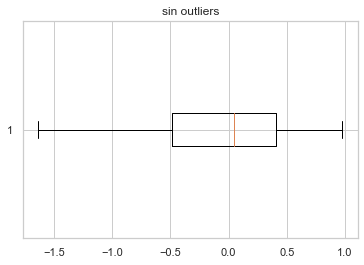

In [46]:
plt.title("sin outliers")
plt.boxplot(sinOutliers["PCA2"], vert=False)
plt.show

In [47]:
sinOutliers

,PCA1,PCA2,Clase,Brix
0,-0.454774,-0.040880,Borgoña,4.195235
1,-0.477807,-0.266169,Borgoña,4.266146
2,-0.454089,-0.431465,Borgoña,4.358899
3,-0.384052,-0.537706,Borgoña,4.494441
4,-0.304235,-0.370547,Borgoña,4.289522
...,...,...,...,...
195,-0.074584,-0.226213,Italia,3.435113
196,0.370123,-0.180527,Italia,3.449638
197,0.254371,-0.057287,Italia,3.605551
198,-0.101567,0.119436,Italia,3.478505


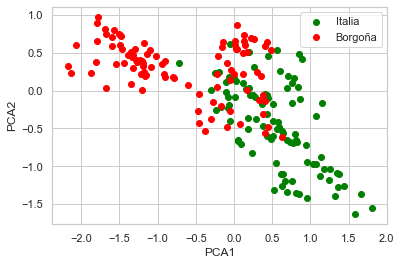

In [48]:
import matplotlib.pyplot as plt

# Supongamos que tienes un DataFrame llamado df2

# Dividir los datos en dos grupos basados en la clase
italia_data = sinOutliers[sinOutliers['Clase'] == 'Italia']
borgona_data = sinOutliers[sinOutliers['Clase'] == 'Borgoña']

# Crear un gráfico de dispersión
plt.scatter(italia_data['PCA1'], italia_data['PCA2'], c='green', label='Italia')
plt.scatter(borgona_data['PCA1'], borgona_data['PCA2'], c='red', label='Borgoña')

# Etiquetas y leyenda
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()

# Mostrar el gráfico
plt.show()

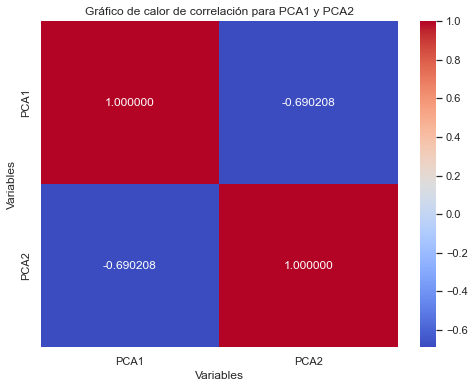

In [49]:
# Calcular la matriz de correlación
correlation_matrix = sinOutliers[['PCA1', 'PCA2']].corr()

# Crear el gráfico de calor
plt.figure(figsize=(8, 6))  # Ajusta el tamaño de la figura según tus preferencias
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".6f")

# Agregar etiquetas a los ejes
plt.xlabel("Variables")
plt.ylabel("Variables")
plt.title("Gráfico de calor de correlación para PCA1 y PCA2")

# Mostrar el gráfico
plt.show()

# REGRESIÓN LINEAL

# UVA ITALIA

In [50]:
#MODELO DE REGRESION LINEAL
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [51]:
sinOutliers

,PCA1,PCA2,Clase,Brix
0,-0.454774,-0.040880,Borgoña,4.195235
1,-0.477807,-0.266169,Borgoña,4.266146
2,-0.454089,-0.431465,Borgoña,4.358899
3,-0.384052,-0.537706,Borgoña,4.494441
4,-0.304235,-0.370547,Borgoña,4.289522
...,...,...,...,...
195,-0.074584,-0.226213,Italia,3.435113
196,0.370123,-0.180527,Italia,3.449638
197,0.254371,-0.057287,Italia,3.605551
198,-0.101567,0.119436,Italia,3.478505


In [52]:
# Reemplaza 'Borgoña' con 0 e 'Italia' con 1 en la columna 'Clase'
#df2['Clase'] = df2['Clase'].replace({'Borgoña': 1, 'Italia': 0})
#pred_data = df2[df2['Clase'].isin([0, 1])]
#pred_data
# Filtra las filas donde la columna "Clase" es igual a "Italia"
pred_italia = sinOutliers[sinOutliers['Clase'] == 'Italia'][['PCA1', 'PCA2']]
pred_italia

,PCA1,PCA2
104,0.565966,-0.503385
105,0.819222,-0.681986
106,0.946970,-0.719922
107,0.642101,-0.557142
108,0.689603,-0.656837
...,...,...
195,-0.074584,-0.226213
196,0.370123,-0.180527
197,0.254371,-0.057287
198,-0.101567,0.119436


In [53]:
#CREACIÓN DE UNA NUEVA DATA
#data_new = data.filter(items = ["Dependent_Variable_SquareRoot", "Clase"])
# Renombrar las columnas y asignar el resultado de vuelta a data_new
#data_new = data_new.rename(columns={'Dependent_Variable_SquareRoot': 'Brix'})
#data_new['Clase'] = data_new['Clase'].replace({'Borgoña': 0, 'Italia': 1})
#data_new
# Filtra las filas donde la columna "Clase" es igual a "Italia" y selecciona las columnas "Dependent_Variable_SquareRoot" y "Clase"
data_italia = sinOutliers[sinOutliers['Clase'] == 'Italia'][["Brix"]]
data_italia

,Brix
104,4.135215
105,4.159327
106,4.024922
107,4.012481
108,4.000000
...,...
195,3.435113
196,3.449638
197,3.605551
198,3.478505


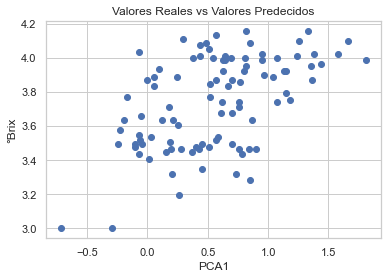

In [54]:
import matplotlib.pyplot as plt
plt.scatter(pred_italia['PCA1'],data_italia)
plt.title("Valores Reales vs Valores Predecidos")
plt.xlabel("PCA1")
plt.ylabel("°Brix")
plt.show()

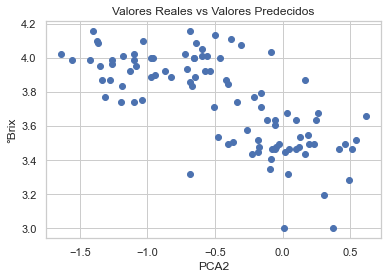

In [55]:
import matplotlib.pyplot as plt
plt.scatter(pred_italia['PCA2'],data_italia)
plt.title("Valores Reales vs Valores Predecidos")
plt.xlabel("PCA2")
plt.ylabel("°Brix")
plt.show()

# ENTRENAMIENTO 1

In [56]:
#Se importa la parte de partición de la data
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(pred_italia,data_italia,test_size=0.3, random_state=83)

In [57]:
#Se llama a la librería de regresión lineal
modelo_rl = linear_model.LinearRegression()
modelo_rl.fit(x_train,y_train)

LinearRegression()

In [58]:
#calculamos los valores predicho
y_pred = modelo_rl.predict(x_test)
print(y_pred)

[[4.06220501]
 [3.5686539 ]
 [3.62027339]
 [3.51418837]
 [3.74226798]
 [3.81361615]
 [3.78093749]
 [3.76597876]
 [3.47680808]
 [3.81939242]
 [3.43142457]
 [3.47716305]
 [3.69752705]
 [3.76974999]
 [3.65156967]
 [3.75510352]
 [3.56687584]
 [4.01570828]
 [3.59821471]
 [3.53572932]
 [3.92159984]
 [3.61406587]
 [3.5957482 ]
 [3.96997764]
 [3.58087135]
 [3.61126603]
 [3.71982792]
 [3.78766838]
 [3.71756019]]


In [59]:
print('Coeficiente beta 1: ',modelo_rl.coef_,'intercepto',modelo_rl.intercept_)

Coeficiente beta 1:  [[ 0.07836963 -0.28319328]] intercepto [3.56205645]


In [60]:
valortest1 = x_test['PCA1']
valortest2 = x_test['PCA2']

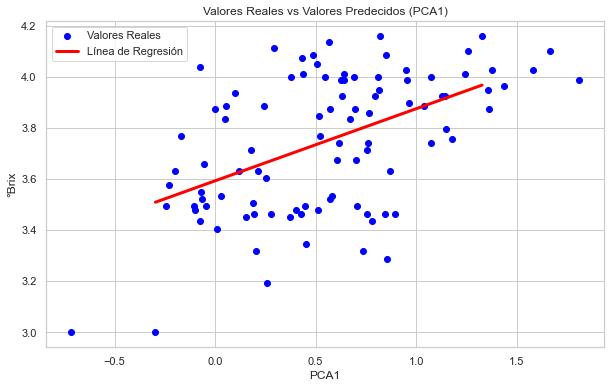

In [61]:
import matplotlib.pyplot as plt
import numpy as np

# Ajustar un modelo de regresión lineal a los datos
regression_model = LinearRegression()
regression_model.fit(valortest1.values.reshape(-1, 1), y_test)

# Generar valores para la línea de regresión
x_line = np.linspace(valortest1.min(), valortest1.max(), 100).reshape(-1, 1)
y_line = regression_model.predict(x_line)

# Crear el gráfico
plt.figure(figsize=(10, 6))

# Trazar los valores reales
plt.scatter(pred_italia['PCA1'],data_italia, label='Valores Reales', marker='o', color='blue')

# Trazar la línea de regresión
plt.plot(x_line, y_line, label='Línea de Regresión', color='red', linewidth=3)

# Configurar el título y etiquetas de los ejes
plt.title("Valores Reales vs Valores Predecidos (PCA1)")
plt.xlabel("PCA1")
plt.ylabel("°Brix")

# Agregar una leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

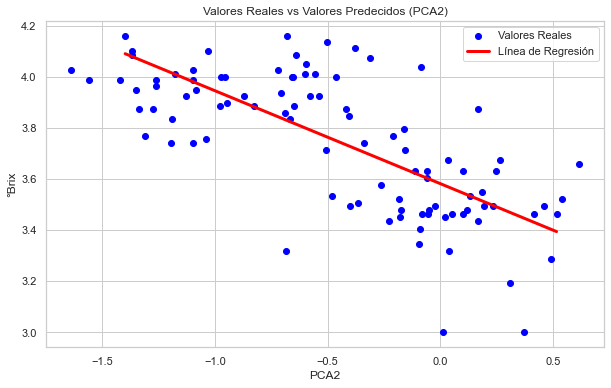

In [62]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Ajustar un modelo de regresión lineal a los datos
regression_model = LinearRegression()
regression_model.fit(valortest2.values.reshape(-1, 1), y_test)

# Generar valores para la línea de regresión
x_line = np.linspace(valortest2.min(), valortest2.max(), 100).reshape(-1, 1)
y_line = regression_model.predict(x_line)

# Crear el gráfico
plt.figure(figsize=(10, 6))

# Trazar los valores reales
plt.scatter(pred_italia['PCA2'],data_italia, label='Valores Reales', marker='o', color='blue')

# Trazar la línea de regresión
plt.plot(x_line, y_line, label='Línea de Regresión', color='red', linewidth=3)

# Configurar el título y etiquetas de los ejes
plt.title("Valores Reales vs Valores Predecidos (PCA2)")
plt.xlabel("PCA2")
plt.ylabel("°Brix")

# Agregar una leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

In [63]:
y_test = y_test['Brix'].values
y_pred = y_pred.ravel()  # Asegura que y_pred sea un array unidimensional
evaluation__real_pred = pd.DataFrame({'Valor real':y_test,'Valor Predecido':y_pred,'Diferencia':y_test-y_pred})
evaluation__real_pred

,Valor real,Valor Predecido,Diferencia
0,4.159327,4.062205,0.097122
1,3.449638,3.568654,-0.119016
2,3.435113,3.620273,-0.185161
3,3.872983,3.514188,0.358795
4,3.741657,3.742268,-0.000611
5,3.316625,3.813616,-0.496991
6,4.086563,3.780937,0.305626
7,4.012481,3.765979,0.246502
8,3.633180,3.476808,0.156372
9,4.159327,3.819392,0.339934


In [64]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# CALCULAR METRICAS DE RENDIMIENTO
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print ("Root Mean Squared Error:" , rmse)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 0.051077623227928255
Root Mean Squared Error: 0.22600359118369834
R-squared (R2) Score: 0.37264029884944094


In [65]:
modelo_rl.score(x_train,y_train)

0.5710501928934941

# ENTRENAMIENTO 2

In [66]:
#Se importa la parte de partición de la data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(pred_italia,data_italia,test_size=0.3, random_state=36)

In [67]:
#Se llama a la librería de regresión lineal
modelo_rl = linear_model.LinearRegression()
modelo_rl.fit(x_train,y_train)

LinearRegression()

In [68]:
#calculamos los valores predicho
y_pred = modelo_rl.predict(x_test)
print(y_pred)

[[3.54075054]
 [3.40951261]
 [3.83766899]
 [3.70770669]
 [3.6724872 ]
 [4.04370498]
 [4.0185866 ]
 [3.76308985]
 [3.35865118]
 [3.62877399]
 [3.8086949 ]
 [3.51983517]
 [3.73808392]
 [3.99598076]
 [3.6030791 ]
 [3.47533727]
 [3.74062601]
 [3.59145404]
 [3.45364014]
 [3.76233732]
 [3.5621747 ]
 [3.70776969]
 [3.50074495]
 [3.73733258]
 [3.71626882]
 [3.58118393]
 [3.5138825 ]
 [4.09155942]
 [3.4476895 ]]


In [69]:
print('Coeficiente beta 1: ',modelo_rl.coef_,'intercepto',modelo_rl.intercept_)

Coeficiente beta 1:  [[ 0.08822179 -0.29292893]] intercepto [3.5432396]


In [70]:
valortest1 = x_test['PCA1']
valortest2 = x_test['PCA2']

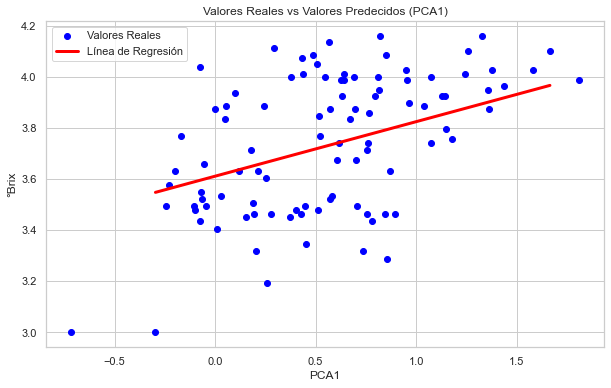

In [71]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Ajustar un modelo de regresión lineal a los datos
regression_model = LinearRegression()
regression_model.fit(valortest1.values.reshape(-1, 1), y_test)

# Generar valores para la línea de regresión
x_line = np.linspace(valortest1.min(), valortest1.max(), 100).reshape(-1, 1)
y_line = regression_model.predict(x_line)

# Crear el gráfico
plt.figure(figsize=(10, 6))

# Trazar los valores reales
plt.scatter(pred_italia['PCA1'],data_italia, label='Valores Reales', marker='o', color='blue')

# Trazar la línea de regresión
plt.plot(x_line, y_line, label='Línea de Regresión', color='red', linewidth=3)

# Configurar el título y etiquetas de los ejes
plt.title("Valores Reales vs Valores Predecidos (PCA1)")
plt.xlabel("PCA1")
plt.ylabel("°Brix")

# Agregar una leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

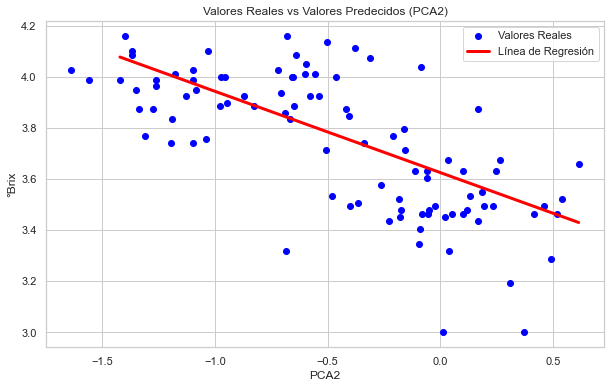

In [72]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Ajustar un modelo de regresión lineal a los datos
regression_model = LinearRegression()
regression_model.fit(valortest2.values.reshape(-1, 1), y_test)

# Generar valores para la línea de regresión
x_line = np.linspace(valortest2.min(), valortest2.max(), 100).reshape(-1, 1)
y_line = regression_model.predict(x_line)

# Crear el gráfico
plt.figure(figsize=(10, 6))

# Trazar los valores reales
plt.scatter(pred_italia['PCA2'],data_italia, label='Valores Reales', marker='o', color='blue')

# Trazar la línea de regresión
plt.plot(x_line, y_line, label='Línea de Regresión', color='red', linewidth=3)

# Configurar el título y etiquetas de los ejes
plt.title("Valores Reales vs Valores Predecidos (PCA2)")
plt.xlabel("PCA2")
plt.ylabel("°Brix")

# Agregar una leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

In [73]:
y_test = y_test['Brix'].values
y_pred = y_pred.ravel()  # Asegura que y_pred sea un array unidimensional
evaluation__real_pred = pd.DataFrame({'Valor real':y_test,'Valor Predecido':y_pred,'Diferencia':y_test-y_pred})
evaluation__real_pred

,Valor real,Valor Predecido,Diferencia
0,3.492850,3.540751,-0.047901
1,3.464102,3.409513,0.054589
2,4.024922,3.837669,0.187253
3,3.714835,3.707707,0.007128
4,4.074310,3.672487,0.401823
5,3.987480,4.043705,-0.056225
6,4.086563,4.018587,0.067977
7,4.012481,3.763090,0.249391
8,3.660601,3.358651,0.301950
9,3.449638,3.628774,-0.179136


In [74]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# CALCULAR METRICAS DE RENDIMIENTO
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print ("Root Mean Squared Error:" , rmse)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 0.05446417307626245
Root Mean Squared Error: 0.23337560514385913
R-squared (R2) Score: 0.3646902946563223


In [75]:
modelo_rl.score(x_train,y_train)

0.5781005934691461

# ENTRENAMIENTO 3

In [76]:
#Se importa la parte de partición de la data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(pred_italia,data_italia,test_size=0.3, random_state=32)

In [77]:
#Se llama a la librería de regresión lineal
modelo_rl = linear_model.LinearRegression()
modelo_rl.fit(x_train,y_train)

LinearRegression()

In [78]:
#calculamos los valores predicho
y_pred = modelo_rl.predict(x_test)
print(y_pred)

[[3.5869076 ]
 [3.57750825]
 [3.49478173]
 [3.62831996]
 [3.68444739]
 [4.07631936]
 [3.4887436 ]
 [3.50933373]
 [3.89447347]
 [3.85756751]
 [3.33221677]
 [3.71886568]
 [4.03302197]
 [4.21338928]
 [3.74527101]
 [3.59380702]
 [3.72429642]
 [3.94874536]
 [3.99109888]
 [3.83293463]
 [4.21045686]
 [3.66940466]
 [3.98251123]
 [3.78643262]
 [3.82562959]
 [3.7509507 ]
 [3.65880977]
 [3.43020034]
 [3.79681147]]


In [79]:
print('Coeficiente beta 1: ',modelo_rl.coef_,'intercepto',modelo_rl.intercept_)

Coeficiente beta 1:  [[ 0.0976133  -0.32061748]] intercepto [3.53431103]


In [80]:
valortest1 = x_test['PCA1']
valortest2 = x_test['PCA2']

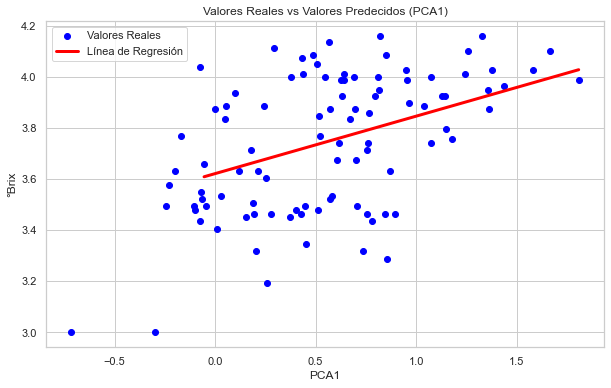

In [81]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Ajustar un modelo de regresión lineal a los datos
regression_model = LinearRegression()
regression_model.fit(valortest1.values.reshape(-1, 1), y_test)

# Generar valores para la línea de regresión
x_line = np.linspace(valortest1.min(), valortest1.max(), 100).reshape(-1, 1)
y_line = regression_model.predict(x_line)

# Crear el gráfico
plt.figure(figsize=(10, 6))

# Trazar los valores reales
plt.scatter(pred_italia['PCA1'],data_italia, label='Valores Reales', marker='o', color='blue')

# Trazar la línea de regresión
plt.plot(x_line, y_line, label='Línea de Regresión', color='red', linewidth=3)

# Configurar el título y etiquetas de los ejes
plt.title("Valores Reales vs Valores Predecidos (PCA1)")
plt.xlabel("PCA1")
plt.ylabel("°Brix")

# Agregar una leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

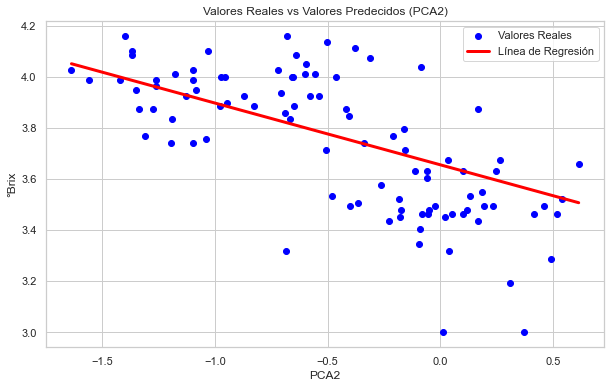

In [82]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Ajustar un modelo de regresión lineal a los datos
regression_model = LinearRegression()
regression_model.fit(valortest2.values.reshape(-1, 1), y_test)

# Generar valores para la línea de regresión
x_line = np.linspace(valortest2.min(), valortest2.max(), 100).reshape(-1, 1)
y_line = regression_model.predict(x_line)

# Crear el gráfico
plt.figure(figsize=(10, 6))

# Trazar los valores reales
plt.scatter(pred_italia['PCA2'],data_italia, label='Valores Reales', marker='o', color='blue')

# Trazar la línea de regresión
plt.plot(x_line, y_line, label='Línea de Regresión', color='red', linewidth=3)

# Configurar el título y etiquetas de los ejes
plt.title("Valores Reales vs Valores Predecidos (PCA2)")
plt.xlabel("PCA2")
plt.ylabel("°Brix")

# Agregar una leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

In [83]:
y_test = y_test['Brix'].values
y_pred = y_pred.ravel()  # Asegura que y_pred sea un array unidimensional
evaluation__real_pred = pd.DataFrame({'Valor real':y_test,'Valor Predecido':y_pred,'Diferencia':y_test-y_pred})
evaluation__real_pred

,Valor real,Valor Predecido,Diferencia
0,3.464102,3.586908,-0.122806
1,3.605551,3.577508,0.028043
2,3.535534,3.494782,0.040752
3,3.449638,3.628320,-0.178682
4,4.110961,3.684447,0.426514
5,3.872983,4.076319,-0.203336
6,3.464102,3.488744,-0.024642
7,3.674235,3.509334,0.164901
8,4.000000,3.894473,0.105527
9,4.024922,3.857568,0.167355


In [84]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# CALCULAR METRICAS DE RENDIMIENTO
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print ("Root Mean Squared Error:" , rmse)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 0.05055338846874062
Root Mean Squared Error: 0.22484080694736136
R-squared (R2) Score: 0.18461128401707727


In [85]:
modelo_rl.score(x_train,y_train)

0.6021856232691363

# UVA BORGOÑA

In [86]:
pred_borgo = sinOutliers[sinOutliers['Clase'] == 'Borgoña'][['PCA1', 'PCA2']]
pred_borgo

,PCA1,PCA2
0,-0.454774,-0.040880
1,-0.477807,-0.266169
2,-0.454089,-0.431465
3,-0.384052,-0.537706
4,-0.304235,-0.370547
...,...,...
92,-1.506885,0.744723
93,-1.345255,0.510453
94,-1.161484,0.189108
95,-1.205754,0.002970


In [87]:
data_borgo = sinOutliers[sinOutliers['Clase'] == 'Borgoña'][["Brix"]]
data_borgo

,Brix
0,4.195235
1,4.266146
2,4.358899
3,4.494441
4,4.289522
...,...
92,4.000000
93,4.024922
94,4.000000
95,4.242641


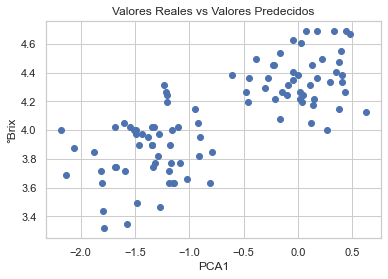

In [88]:
import matplotlib.pyplot as plt
plt.scatter(pred_borgo['PCA1'],data_borgo)
plt.title("Valores Reales vs Valores Predecidos")
plt.xlabel("PCA1")
plt.ylabel("°Brix")
plt.show()

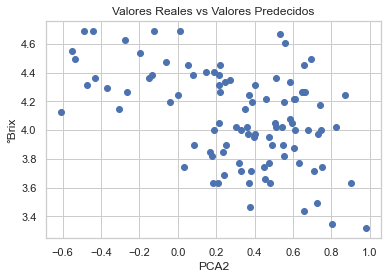

In [89]:
import matplotlib.pyplot as plt
plt.scatter(pred_borgo['PCA2'],data_borgo)
plt.title("Valores Reales vs Valores Predecidos")
plt.xlabel("PCA2")
plt.ylabel("°Brix")
plt.show()

# ENTRENAMIENTO 1

In [90]:
#Se importa la parte de partición de la data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(pred_borgo,data_borgo,test_size=0.3, random_state=79)

In [91]:
modelo_rl = linear_model.LinearRegression()
modelo_rl.fit(x_train,y_train)

LinearRegression()

In [92]:
y_pred = modelo_rl.predict(x_test)
print(y_pred)

[[3.97598938]
 [4.38175859]
 [3.78161275]
 [3.94244636]
 [4.12498151]
 [4.43949422]
 [4.2187105 ]
 [4.33433147]
 [3.68154284]
 [3.98860508]
 [4.56161884]
 [4.69516119]
 [4.45635625]
 [3.85172801]
 [3.67056568]
 [4.37474188]
 [4.39055741]
 [4.23745104]
 [3.80935814]
 [4.49920357]
 [3.68349719]
 [4.2884854 ]
 [4.00661211]
 [4.53598884]
 [3.95935292]
 [4.11737843]
 [3.76888564]
 [4.51280416]
 [3.80578446]
 [4.28330047]]


In [93]:
valortest3 = x_test['PCA1']
valortest4 = x_test['PCA2']

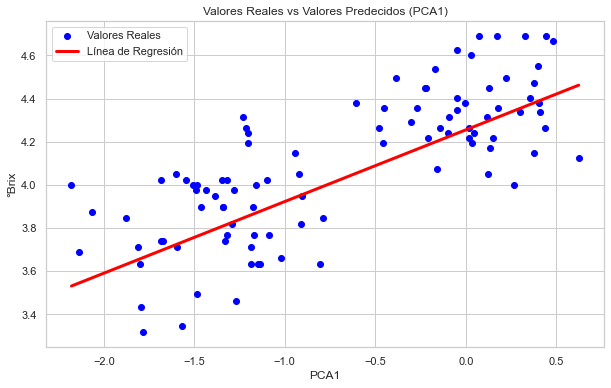

In [94]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Ajustar un modelo de regresión lineal a los datos
regression_model = LinearRegression()
regression_model.fit(valortest3.values.reshape(-1, 1), y_test)

# Generar valores para la línea de regresión
x_line = np.linspace(valortest3.min(), valortest3.max(), 100).reshape(-1, 1)
y_line = regression_model.predict(x_line)

# Crear el gráfico
plt.figure(figsize=(10, 6))

# Trazar los valores reales
plt.scatter(pred_borgo['PCA1'],data_borgo, label='Valores Reales', marker='o', color='blue')

# Trazar la línea de regresión
plt.plot(x_line, y_line, label='Línea de Regresión', color='red', linewidth=3)

# Configurar el título y etiquetas de los ejes
plt.title("Valores Reales vs Valores Predecidos (PCA1)")
plt.xlabel("PCA1")
plt.ylabel("°Brix")

# Agregar una leyenda
plt.legend()

# Mostrar el gráfico
plt.show()


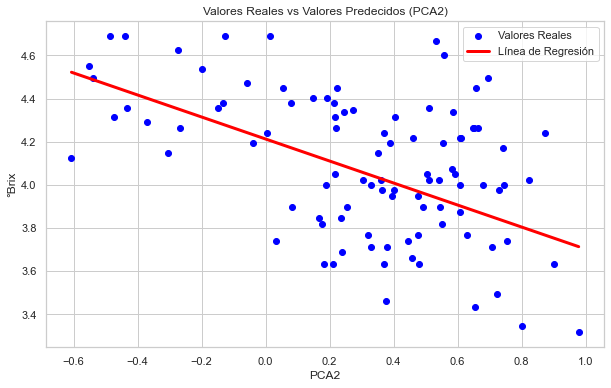

In [95]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Ajustar un modelo de regresión lineal a los datos
regression_model = LinearRegression()
regression_model.fit(valortest4.values.reshape(-1, 1), y_test)

# Generar valores para la línea de regresión
x_line = np.linspace(valortest4.min(), valortest4.max(), 100).reshape(-1, 1)
y_line = regression_model.predict(x_line)

# Crear el gráfico
plt.figure(figsize=(10, 6))

# Trazar los valores reales
plt.scatter(pred_borgo['PCA2'],data_borgo, label='Valores Reales', marker='o', color='blue')

# Trazar la línea de regresión
plt.plot(x_line, y_line, label='Línea de Regresión', color='red', linewidth=3)

# Configurar el título y etiquetas de los ejes
plt.title("Valores Reales vs Valores Predecidos (PCA2)")
plt.xlabel("PCA2")
plt.ylabel("°Brix")

# Agregar una leyenda
plt.legend()

# Mostrar el gráfico
plt.show()


In [96]:
y_test = y_test['Brix'].values
y_pred = y_pred.ravel()  # Asegura que y_pred sea un array unidimensional
evaluation__real_pred = pd.DataFrame({'Valor real':y_test,'Valor Predecido':y_pred,'Diferencia':y_test-y_pred})
evaluation__real_pred

,Valor real,Valor Predecido,Diferencia
0,3.714835,3.975989,-0.261154
1,4.312772,4.381759,-0.068987
2,3.714835,3.781613,-0.066778
3,3.464102,3.942446,-0.478345
4,3.847077,4.124982,-0.277905
5,4.690416,4.439494,0.250922
6,4.266146,4.218711,0.047435
7,4.000000,4.334331,-0.334331
8,3.633180,3.681543,-0.048362
9,4.266146,3.988605,0.277541


In [97]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# CALCULAR METRICAS DE RENDIMIENTO
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print ("Root Mean Squared Error:" , rmse)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 0.0750105485939302
Root Mean Squared Error: 0.2738805370849309
R-squared (R2) Score: 0.5034252898552399


In [98]:
modelo_rl.score(x_train,y_train)

0.6999807934118866

# ENTRENAMIENTO 2

In [99]:
#Se importa la parte de partición de la data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(pred_borgo,data_borgo,test_size=0.3, random_state=48)

In [100]:
modelo_rl = linear_model.LinearRegression()
modelo_rl.fit(x_train,y_train)

LinearRegression()

In [101]:
y_pred = modelo_rl.predict(x_test)
print(y_pred)

[[4.78919448]
 [4.52855253]
 [3.84649961]
 [3.91080258]
 [3.91319349]
 [4.11181219]
 [4.57910839]
 [4.01837478]
 [3.7643414 ]
 [4.0810673 ]
 [4.35571915]
 [3.73519915]
 [4.55420039]
 [4.29372843]
 [4.6975215 ]
 [3.85119261]
 [4.48147273]
 [3.85358088]
 [3.64788744]
 [4.19003928]
 [4.43189137]
 [3.9625716 ]
 [3.86572752]
 [3.84475837]
 [4.27806865]
 [3.91590172]
 [4.62171163]
 [3.91294348]
 [3.58953614]
 [4.2742835 ]]


In [102]:
valortest3 = x_test['PCA1']
valortest4 = x_test['PCA2']

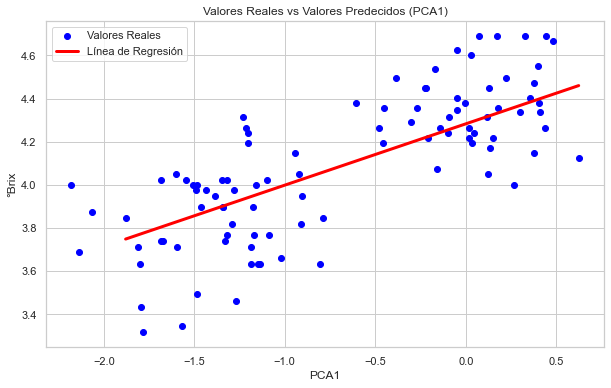

In [103]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Ajustar un modelo de regresión lineal a los datos
regression_model = LinearRegression()
regression_model.fit(valortest3.values.reshape(-1, 1), y_test)

# Generar valores para la línea de regresión
x_line = np.linspace(valortest3.min(), valortest3.max(), 100).reshape(-1, 1)
y_line = regression_model.predict(x_line)

# Crear el gráfico
plt.figure(figsize=(10, 6))

# Trazar los valores reales
plt.scatter(pred_borgo['PCA1'],data_borgo, label='Valores Reales', marker='o', color='blue')

# Trazar la línea de regresión
plt.plot(x_line, y_line, label='Línea de Regresión', color='red', linewidth=3)

# Configurar el título y etiquetas de los ejes
plt.title("Valores Reales vs Valores Predecidos (PCA1)")
plt.xlabel("PCA1")
plt.ylabel("°Brix")

# Agregar una leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

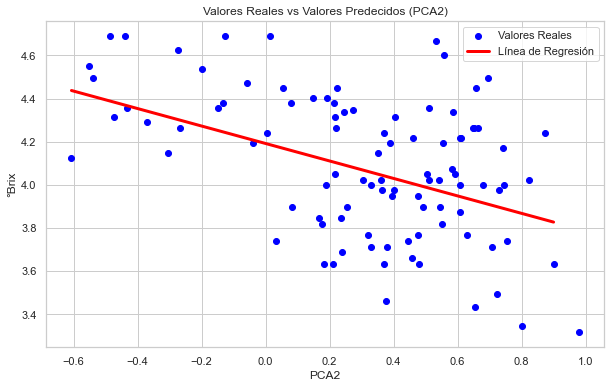

In [104]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Ajustar un modelo de regresión lineal a los datos
regression_model = LinearRegression()
regression_model.fit(valortest4.values.reshape(-1, 1), y_test)

# Generar valores para la línea de regresión
x_line = np.linspace(valortest4.min(), valortest4.max(), 100).reshape(-1, 1)
y_line = regression_model.predict(x_line)

# Crear el gráfico
plt.figure(figsize=(10, 6))

# Trazar los valores reales
plt.scatter(pred_borgo['PCA2'],data_borgo, label='Valores Reales', marker='o', color='blue')

# Trazar la línea de regresión
plt.plot(x_line, y_line, label='Línea de Regresión', color='red', linewidth=3)

# Configurar el título y etiquetas de los ejes
plt.title("Valores Reales vs Valores Predecidos (PCA2)")
plt.xlabel("PCA2")
plt.ylabel("°Brix")

# Agregar una leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

In [105]:
y_test = y_test['Brix'].values
y_pred = y_pred.ravel()  # Asegura que y_pred sea un array unidimensional
evaluation__real_pred = pd.DataFrame({'Valor real':y_test,'Valor Predecido':y_pred,'Diferencia':y_test-y_pred})
evaluation__real_pred

,Valor real,Valor Predecido,Diferencia
0,4.123106,4.789194,-0.666089
1,4.312772,4.528553,-0.215781
2,4.024922,3.846500,0.178423
3,3.464102,3.910803,-0.446701
4,4.312772,3.913193,0.399578
5,3.633180,4.111812,-0.478632
6,4.381780,4.579108,-0.197328
7,4.147288,4.018375,0.128913
8,3.847077,3.764341,0.082735
9,3.820995,4.081067,-0.260073


In [106]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# CALCULAR METRICAS DE RENDIMIENTO
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print ("Root Mean Squared Error:" , rmse)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 0.0681941443589129
Root Mean Squared Error: 0.26114008569906094
R-squared (R2) Score: 0.3242780290388324


In [107]:
modelo_rl.score(x_train,y_train)

0.7196336044880475

# ENTRENAMIENTO 3

In [108]:
#Se importa la parte de partición de la data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(pred_borgo,data_borgo,test_size=0.3, random_state=90)

In [109]:
modelo_rl = linear_model.LinearRegression()
modelo_rl.fit(x_train,y_train)

LinearRegression()

In [110]:
y_pred = modelo_rl.predict(x_test)
print(y_pred)

[[4.198994  ]
 [3.70724877]
 [3.97756486]
 [4.11738038]
 [3.69692434]
 [3.97075225]
 [4.48198473]
 [4.45568928]
 [4.31043295]
 [3.9757198 ]
 [3.87366938]
 [3.65938027]
 [4.31269149]
 [4.34273397]
 [3.92276366]
 [3.91378135]
 [3.86351998]
 [4.03126274]
 [3.93957682]
 [3.89043999]
 [4.31600146]
 [4.31596851]
 [3.76971524]
 [4.1090263 ]
 [3.99841189]
 [4.72969773]
 [3.7618492 ]
 [4.41248926]
 [4.0279609 ]
 [4.34554008]]


In [111]:
valortest3 = x_test['PCA1']
valortest4 = x_test['PCA2']

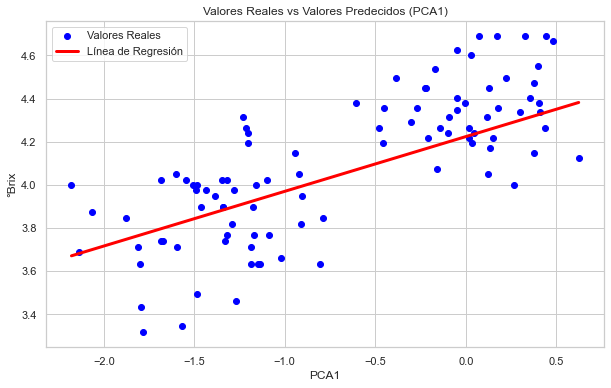

In [112]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Ajustar un modelo de regresión lineal a los datos
regression_model = LinearRegression()
regression_model.fit(valortest3.values.reshape(-1, 1), y_test)

# Generar valores para la línea de regresión
x_line = np.linspace(valortest3.min(), valortest3.max(), 100).reshape(-1, 1)
y_line = regression_model.predict(x_line)

# Crear el gráfico
plt.figure(figsize=(10, 6))

# Trazar los valores reales
plt.scatter(pred_borgo['PCA1'],data_borgo, label='Valores Reales', marker='o', color='blue')

# Trazar la línea de regresión
plt.plot(x_line, y_line, label='Línea de Regresión', color='red', linewidth=3)

# Configurar el título y etiquetas de los ejes
plt.title("Valores Reales vs Valores Predecidos (PCA1)")
plt.xlabel("PCA1")
plt.ylabel("°Brix")

# Agregar una leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

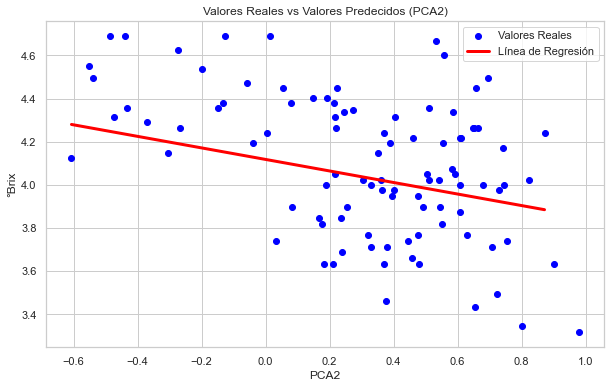

In [113]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Ajustar un modelo de regresión lineal a los datos
regression_model = LinearRegression()
regression_model.fit(valortest4.values.reshape(-1, 1), y_test)

# Generar valores para la línea de regresión
x_line = np.linspace(valortest4.min(), valortest4.max(), 100).reshape(-1, 1)
y_line = regression_model.predict(x_line)

# Crear el gráfico
plt.figure(figsize=(10, 6))

# Trazar los valores reales
plt.scatter(pred_borgo['PCA2'],data_borgo, label='Valores Reales', marker='o', color='blue')

# Trazar la línea de regresión
plt.plot(x_line, y_line, label='Línea de Regresión', color='red', linewidth=3)

# Configurar el título y etiquetas de los ejes
plt.title("Valores Reales vs Valores Predecidos (PCA2)")
plt.xlabel("PCA2")
plt.ylabel("°Brix")

# Agregar una leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

In [114]:
y_test = y_test['Brix'].values
y_pred = y_pred.ravel()  # Asegura que y_pred sea un array unidimensional
evaluation__real_pred = pd.DataFrame({'Valor real':y_test,'Valor Predecido':y_pred,'Diferencia':y_test-y_pred})
evaluation__real_pred

,Valor real,Valor Predecido,Diferencia
0,4.242641,4.198994,0.043647
1,3.741657,3.707249,0.034409
2,3.660601,3.977565,-0.316964
3,3.847077,4.117380,-0.270304
4,3.435113,3.696924,-0.261812
5,3.898718,3.970752,-0.072035
6,4.312772,4.481985,-0.169213
7,4.404543,4.455689,-0.051146
8,4.049691,4.310433,-0.260742
9,4.266146,3.975720,0.290426


In [115]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# CALCULAR METRICAS DE RENDIMIENTO
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print ("Root Mean Squared Error:" , rmse)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 0.06398126418821111
Root Mean Squared Error: 0.2529451802035593
R-squared (R2) Score: 0.3008055606213198


In [116]:
modelo_rl.score(x_train,y_train)

0.7254465759016641

# RANDOM FOREST

# UVA ITALIA

# ENTRENAMIENTO 1

In [117]:
#Se importa la parte de partición de la data
from sklearn.model_selection import train_test_split
X_train_italia, X_test_italia, y_train_italia, y_test_italia = train_test_split(pred_italia, data_italia , test_size=0.3, random_state=0)

In [118]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
#scaling the training set
X_train_italia = sc.fit_transform(X_train_italia)
#scaling the test set
X_test_italia = sc.transform(X_test_italia)

#scaling the training set
y_train_italia = sc.fit_transform(y_train_italia)
#scaling the test set
y_test_italia = sc.transform(y_test_italia)

In [119]:
from sklearn.ensemble import RandomForestRegressor

# Crear el modelo de regresión aleatoria
rf_reg = RandomForestRegressor(random_state=1, n_estimators=1)

# Convertir y_train_italia a una matriz bidimensional
y_train_italia = y_train_italia.ravel()

# Entrenar el modelo con los datos de entrenamiento
regressor = rf_reg.fit(X_train_italia, y_train_italia)

# Realizar predicciones en los datos de prueba
y_pred_italia = regressor.predict(X_test_italia)


In [120]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# CALCULAR METRICAS DE RENDIMIENTO
mse = mean_squared_error(y_test_italia, y_pred_italia)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_italia, y_pred_italia)

print("Mean Squared Error (MSE):", mse)
print ("Root Mean Squared Error (RMSE):" , rmse)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 0.7557036385042256
Root Mean Squared Error (RMSE): 0.8693121640148754
R-squared (R2) Score: 0.3636750454757227


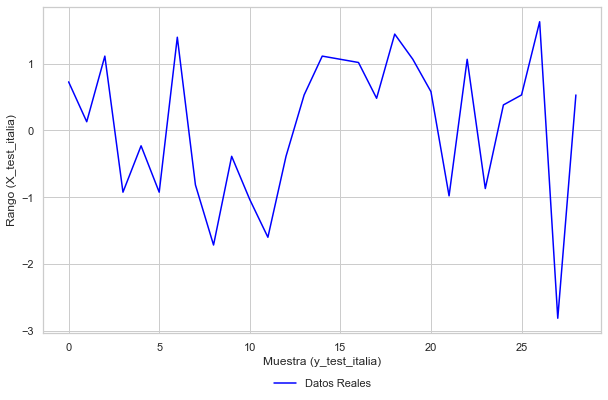

In [121]:
import matplotlib.pyplot as plt
# Estableciendo el tamaño de la figura
plt.rcParams['figure.figsize'] = (10, 6)
x_ax = range(len(X_test_italia))
# Graficando los datos observados y predichos
plt.plot(x_ax, y_test_italia, label='Datos Reales', color='blue', linestyle='-')
plt.ylabel('Rango (X_test_italia)')
plt.xlabel('Muestra (y_test_italia)')
plt.legend(bbox_to_anchor=(0.5,-0.2), loc='lower center', ncol=10, frameon = False)
plt.show()  # Mostrar el gráfico

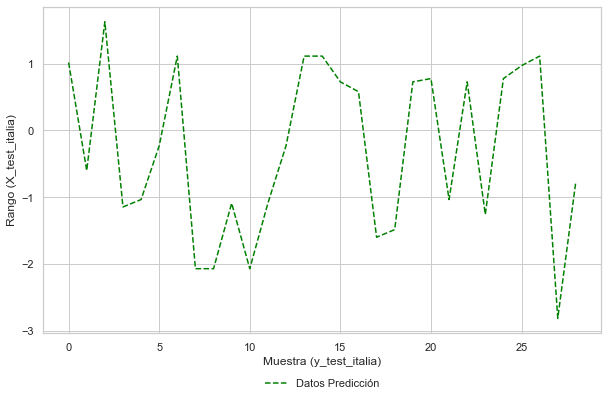

In [122]:
import matplotlib.pyplot as plt
# Estableciendo el tamaño de la figura
plt.rcParams['figure.figsize'] = (10, 6)
x_ax = range(len(X_test_italia))
# Graficando los datos observados y predichos
plt.plot(x_ax, y_pred_italia, label='Datos Predicción', color='green', linestyle='--')
plt.ylabel('Rango (X_test_italia)')
plt.xlabel('Muestra (y_test_italia)')
plt.legend(bbox_to_anchor=(0.5,-0.2), loc='lower center', ncol=10, frameon = False)
plt.show()  # Mostrar el gráfico

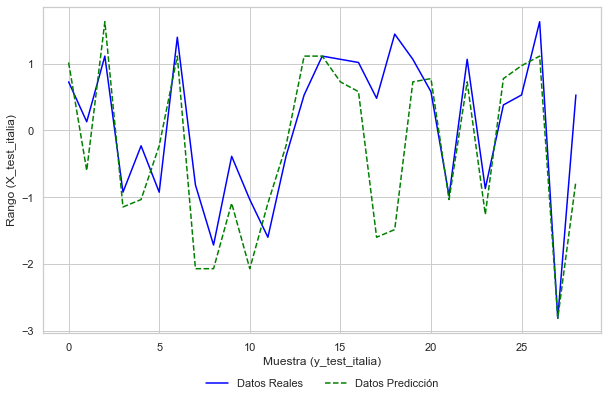

In [123]:
import matplotlib.pyplot as plt
# Estableciendo el tamaño de la figura
plt.rcParams['figure.figsize'] = (10, 6)
x_ax = range(len(X_test_italia))
# Graficando los datos observados y predichos
plt.plot(x_ax, y_test_italia, label='Datos Reales', color='blue', linestyle='-')
plt.plot(x_ax, y_pred_italia, label='Datos Predicción', color='green', linestyle='--')
plt.ylabel('Rango (X_test_italia)')
plt.xlabel('Muestra (y_test_italia)')
plt.legend(bbox_to_anchor=(0.5,-0.2), loc='lower center', ncol=10, frameon = False)
plt.show()  # Mostrar el gráfico

In [124]:
regressor.score(X_train_italia,y_train_italia)

0.5703424989814482

# ENTRENAMIENTO 2

In [125]:
from sklearn.ensemble import RandomForestRegressor

# Crear el modelo de regresión aleatoria
rf_reg = RandomForestRegressor(random_state=3, n_estimators=3)

# Convertir y_train_italia a una matriz bidimensional
y_train_italia = y_train_italia.ravel()

# Entrenar el modelo con los datos de entrenamiento
regressor = rf_reg.fit(X_train_italia, y_train_italia)

# Realizar predicciones en los datos de prueba
y_pred_italia = regressor.predict(X_test_italia)

In [126]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# CALCULAR METRICAS DE RENDIMIENTO
mse = mean_squared_error(y_test_italia, y_pred_italia)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_italia, y_pred_italia)

print("Mean Squared Error (MSE):", mse)
print ("Root Mean Squared Error (RMSE):" , rmse)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 0.5449521375305733
Root Mean Squared Error (RMSE): 0.7382087357452316
R-squared (R2) Score: 0.5411340815846677


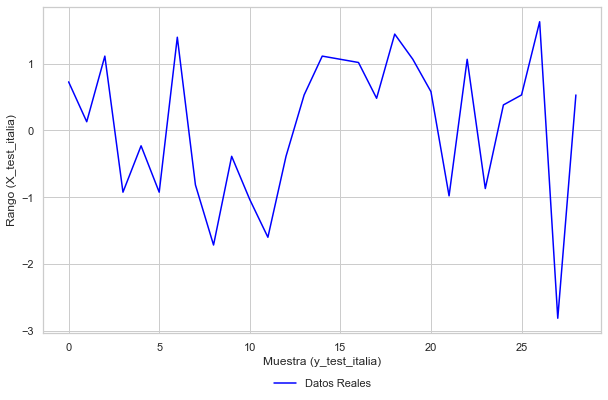

In [127]:
import matplotlib.pyplot as plt
# Estableciendo el tamaño de la figura
plt.rcParams['figure.figsize'] = (10, 6)
x_ax = range(len(X_test_italia))
# Graficando los datos observados y predichos
plt.plot(x_ax, y_test_italia, label='Datos Reales', color='blue', linestyle='-')
plt.ylabel('Rango (X_test_italia)')
plt.xlabel('Muestra (y_test_italia)')
plt.legend(bbox_to_anchor=(0.5,-0.2), loc='lower center', ncol=10, frameon = False)
plt.show()  # Mostrar el gráfico

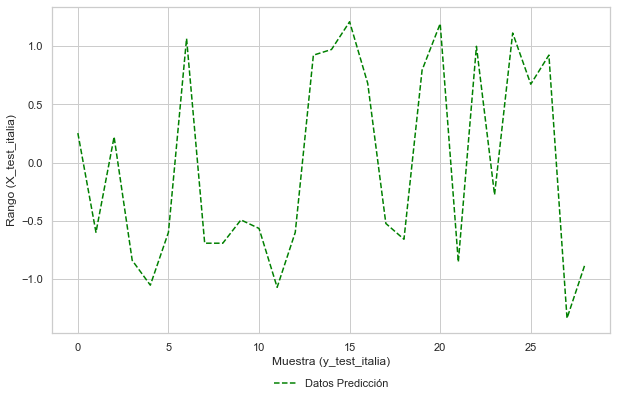

In [128]:
import matplotlib.pyplot as plt
# Estableciendo el tamaño de la figura
plt.rcParams['figure.figsize'] = (10, 6)
x_ax = range(len(X_test_italia))
# Graficando los datos observados y predichos
plt.plot(x_ax, y_pred_italia, label='Datos Predicción', color='green', linestyle='--')
plt.ylabel('Rango (X_test_italia)')
plt.xlabel('Muestra (y_test_italia)')
plt.legend(bbox_to_anchor=(0.5,-0.2), loc='lower center', ncol=10, frameon = False)
plt.show()  # Mostrar el gráfico

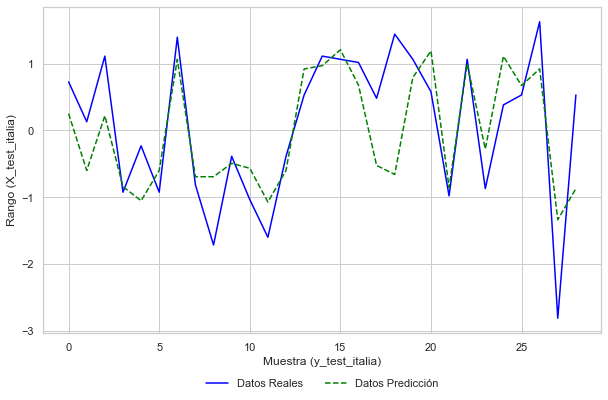

In [129]:
import matplotlib.pyplot as plt
# Estableciendo el tamaño de la figura
plt.rcParams['figure.figsize'] = (10, 6)
x_ax = range(len(X_test_italia))
# Graficando los datos observados y predichos
plt.plot(x_ax, y_test_italia, label='Datos Reales', color='blue', linestyle='-')
plt.plot(x_ax, y_pred_italia, label='Datos Predicción', color='green', linestyle='--')
plt.ylabel('Rango (X_test_italia)')
plt.xlabel('Muestra (y_test_italia)')
plt.legend(bbox_to_anchor=(0.5,-0.2), loc='lower center', ncol=10, frameon = False)
plt.show()  # Mostrar el gráfico

In [130]:
regressor.score(X_train_italia,y_train_italia)

0.8057728585379773

# ENTRENAMIENTO 3

In [131]:
from sklearn.ensemble import RandomForestRegressor

# Crear el modelo de regresión aleatoria
rf_reg = RandomForestRegressor(random_state=42, n_estimators=42)

# Convertir y_train_italia a una matriz bidimensional
y_train_italia = y_train_italia.ravel()

# Entrenar el modelo con los datos de entrenamiento
regressor = rf_reg.fit(X_train_italia, y_train_italia)

# Realizar predicciones en los datos de prueba
y_pred_italia = regressor.predict(X_test_italia)

In [132]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# CALCULAR METRICAS DE RENDIMIENTO
mse = mean_squared_error(y_test_italia, y_pred_italia)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_italia, y_pred_italia)

print("Mean Squared Error (MSE):", mse)
print ("Root Mean Squared Error (RMSE):" , rmse)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 0.3049534483881493
Root Mean Squared Error (RMSE): 0.5522259034019948
R-squared (R2) Score: 0.7432201205730655


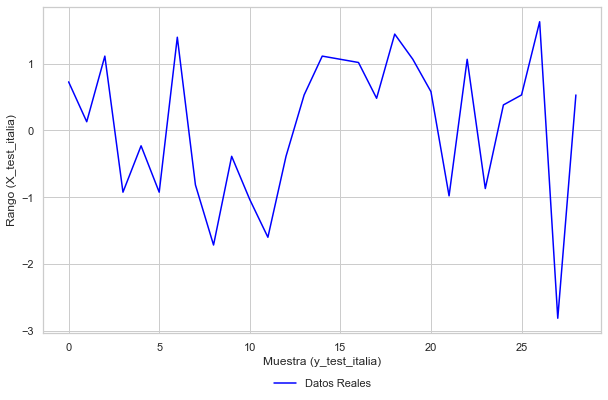

In [133]:
import matplotlib.pyplot as plt
# Estableciendo el tamaño de la figura
plt.rcParams['figure.figsize'] = (10, 6)
x_ax = range(len(X_test_italia))
# Graficando los datos observados y predichos
plt.plot(x_ax, y_test_italia, label='Datos Reales', color='blue', linestyle='-')
plt.ylabel('Rango (X_test_italia)')
plt.xlabel('Muestra (y_test_italia)')
plt.legend(bbox_to_anchor=(0.5,-0.2), loc='lower center', ncol=10, frameon = False)
plt.show()  # Mostrar el gráfico

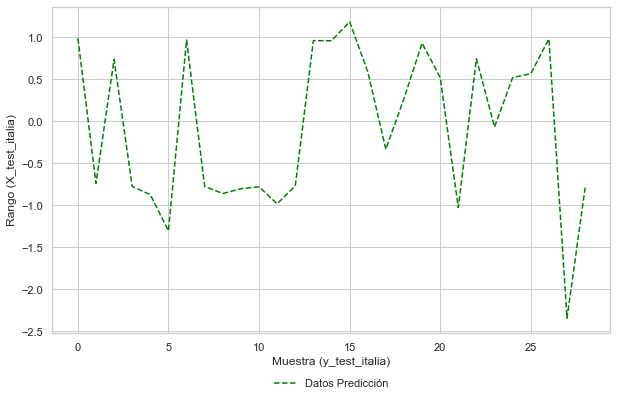

In [134]:
import matplotlib.pyplot as plt
# Estableciendo el tamaño de la figura
plt.rcParams['figure.figsize'] = (10, 6)
x_ax = range(len(X_test_italia))
# Graficando los datos observados y predichos
plt.plot(x_ax, y_pred_italia, label='Datos Predicción', color='green', linestyle='--')
plt.ylabel('Rango (X_test_italia)')
plt.xlabel('Muestra (y_test_italia)')
plt.legend(bbox_to_anchor=(0.5,-0.2), loc='lower center', ncol=10, frameon = False)
plt.show()  # Mostrar el gráfico

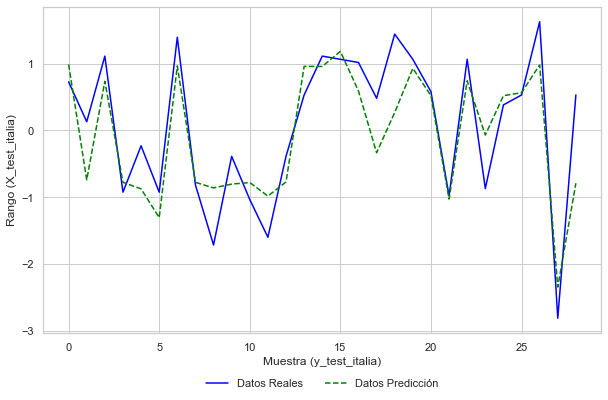

In [135]:
import matplotlib.pyplot as plt
# Estableciendo el tamaño de la figura
plt.rcParams['figure.figsize'] = (10, 6)
x_ax = range(len(X_test_italia))
# Graficando los datos observados y predichos
plt.plot(x_ax, y_test_italia, label='Datos Reales', color='blue', linestyle='-')
plt.plot(x_ax, y_pred_italia, label='Datos Predicción', color='green', linestyle='--')
plt.ylabel('Rango (X_test_italia)')
plt.xlabel('Muestra (y_test_italia)')
plt.legend(bbox_to_anchor=(0.5,-0.2), loc='lower center', ncol=10, frameon = False)
plt.show()  # Mostrar el gráfico

In [136]:
regressor.score(X_train_italia,y_train_italia)

0.9174463686522822

# UVA BORGOÑA

# ENTRENAMIENTO 1

In [137]:
#Se importa la parte de partición de la data
from sklearn.model_selection import train_test_split
X_train_borgoña, X_test_borgoña, y_train_borgoña, y_test_borgoña = train_test_split(pred_borgo, data_borgo, test_size=0.3, random_state=100)

In [138]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
#scaling the training set
X_train_borgoña = sc.fit_transform(X_train_borgoña)
#scaling the test set
X_test_borgoña = sc.transform(X_test_borgoña)

#scaling the training set
y_train_borgoña = sc.fit_transform(y_train_borgoña)
#scaling the test set
y_test_borgoña = sc.transform(y_test_borgoña)

In [139]:
from sklearn.ensemble import RandomForestRegressor

# Crear el modelo de regresión aleatoria
rf_reg = RandomForestRegressor(random_state=4, n_estimators=4)

# Convertir y_train_borgoña a una matriz bidimensional
y_train_borgoña = y_train_borgoña.ravel()

# Entrenar el modelo con los datos de entrenamiento
regressor = rf_reg.fit(X_train_borgoña, y_train_borgoña)

# Realizar predicciones en los datos de prueba
y_pred_borgoña = regressor.predict(X_test_borgoña)

In [140]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# CALCULAR METRICAS DE RENDIMIENTO
mse = mean_squared_error(y_test_borgoña, y_pred_borgoña)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_borgoña, y_pred_borgoña)

print("Mean Squared Error (MSE):", mse)
print ("Root Mean Squared Error (RMSE):" , rmse)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 0.36643554861880284
Root Mean Squared Error (RMSE): 0.6053392012903203
R-squared (R2) Score: 0.5615728085434964


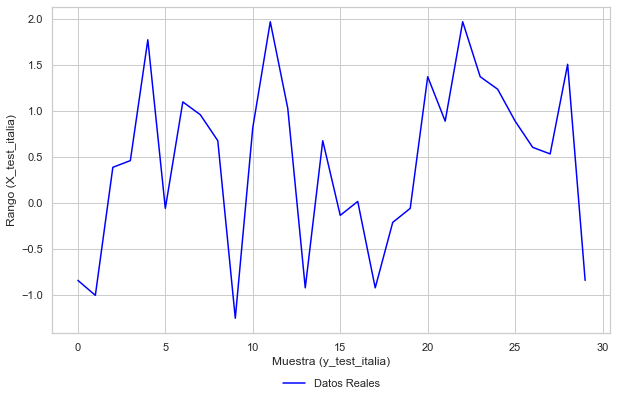

In [141]:
import matplotlib.pyplot as plt
# Estableciendo el tamaño de la figura
plt.rcParams['figure.figsize'] = (10, 6)
x_ax = range(len(X_test_borgoña))
# Graficando los datos observados y predichos
plt.plot(x_ax, y_test_borgoña, label='Datos Reales', color='blue', linestyle='-')
plt.ylabel('Rango (X_test_italia)')
plt.xlabel('Muestra (y_test_italia)')
plt.legend(bbox_to_anchor=(0.5,-0.2), loc='lower center', ncol=10, frameon = False)
plt.show()  # Mostrar el gráfico

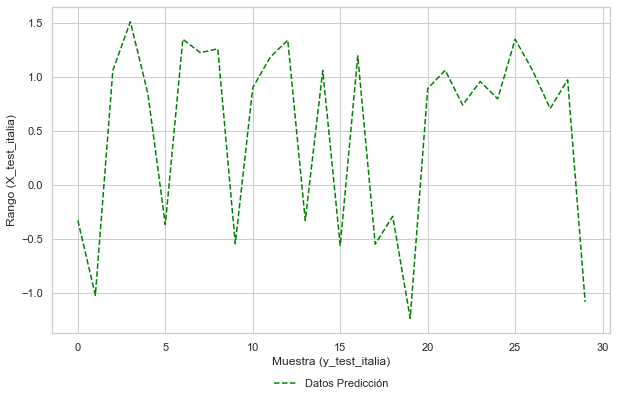

In [142]:
import matplotlib.pyplot as plt
# Estableciendo el tamaño de la figura
plt.rcParams['figure.figsize'] = (10, 6)
x_ax = range(len(X_test_borgoña))
# Graficando los datos observados y predichos
plt.plot(x_ax, y_pred_borgoña, label='Datos Predicción', color='green', linestyle='--')
plt.ylabel('Rango (X_test_italia)')
plt.xlabel('Muestra (y_test_italia)')
plt.legend(bbox_to_anchor=(0.5,-0.2), loc='lower center', ncol=10, frameon = False)
plt.show()  # Mostrar el gráfico

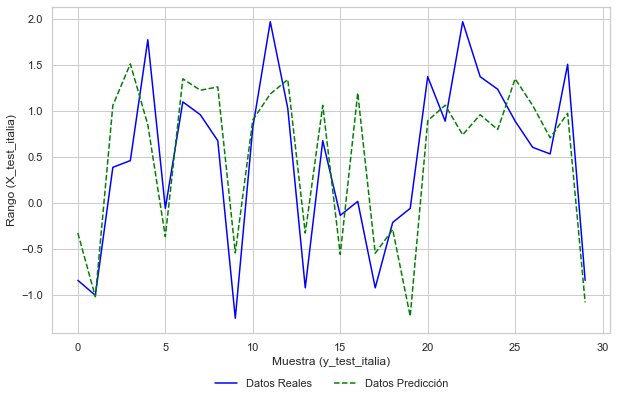

In [143]:
import matplotlib.pyplot as plt
# Estableciendo el tamaño de la figura
plt.rcParams['figure.figsize'] = (10, 6)
x_ax = range(len(X_test_borgoña))
# Graficando los datos observados y predichos
plt.plot(x_ax, y_test_borgoña, label='Datos Reales', color='blue', linestyle='-')
plt.plot(x_ax, y_pred_borgoña, label='Datos Predicción', color='green', linestyle='--')
plt.ylabel('Rango (X_test_italia)')
plt.xlabel('Muestra (y_test_italia)')
plt.legend(bbox_to_anchor=(0.5,-0.2), loc='lower center', ncol=10, frameon = False)
plt.show()  # Mostrar el gráfico

In [144]:
regressor.score(X_train_borgoña,y_train_borgoña)

0.8306204865475928

# ENTRENAMIENTO 2

In [145]:
from sklearn.ensemble import RandomForestRegressor

# Crear el modelo de regresión aleatoria
rf_reg = RandomForestRegressor(random_state=20, n_estimators=20)

# Convertir y_train_borgoña a una matriz bidimensional
y_train_borgoña = y_train_borgoña.ravel()

# Entrenar el modelo con los datos de entrenamiento
regressor = rf_reg.fit(X_train_borgoña, y_train_borgoña)

# Realizar predicciones en los datos de prueba
y_pred_borgoña = regressor.predict(X_test_borgoña)

In [146]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# CALCULAR METRICAS DE RENDIMIENTO
mse = mean_squared_error(y_test_borgoña, y_pred_borgoña)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_borgoña, y_pred_borgoña)

print("Mean Squared Error (MSE):", mse)
print ("Root Mean Squared Error (RMSE):" , rmse)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 0.3412758000415718
Root Mean Squared Error (RMSE): 0.5841881546570179
R-squared (R2) Score: 0.591675559076421


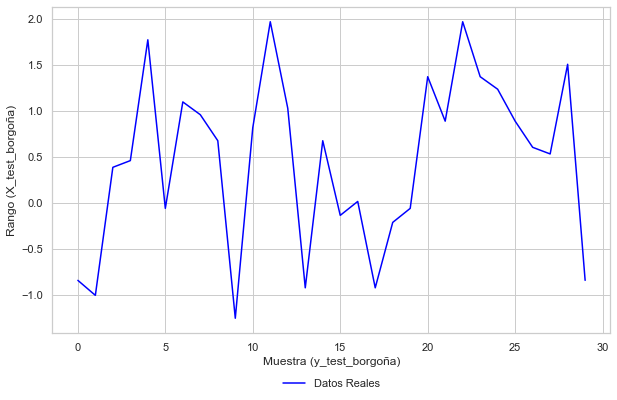

In [147]:
import matplotlib.pyplot as plt
# Estableciendo el tamaño de la figura
plt.rcParams['figure.figsize'] = (10, 6)
x_ax = range(len(X_test_borgoña))
# Graficando los datos observados y predichos
plt.plot(x_ax, y_test_borgoña, label='Datos Reales', color='blue', linestyle='-')
plt.ylabel('Rango (X_test_borgoña)')
plt.xlabel('Muestra (y_test_borgoña)')
plt.legend(bbox_to_anchor=(0.5,-0.2), loc='lower center', ncol=10, frameon = False)
plt.show()  # Mostrar el gráfico

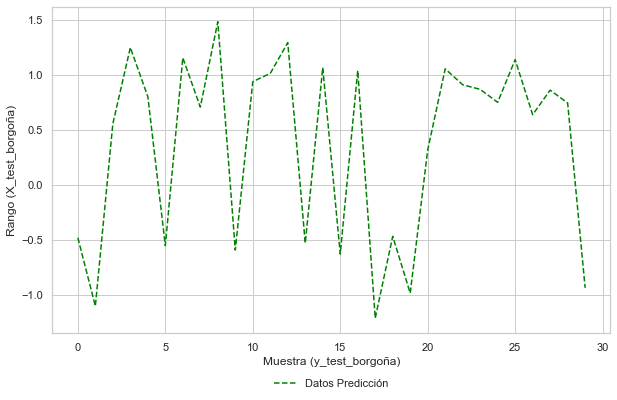

In [148]:
import matplotlib.pyplot as plt
# Estableciendo el tamaño de la figura
plt.rcParams['figure.figsize'] = (10, 6)
x_ax = range(len(X_test_borgoña))
# Graficando los datos observados y predichos
plt.plot(x_ax, y_pred_borgoña, label='Datos Predicción', color='green', linestyle='--')
plt.ylabel('Rango (X_test_borgoña)')
plt.xlabel('Muestra (y_test_borgoña)')
plt.legend(bbox_to_anchor=(0.5,-0.2), loc='lower center', ncol=10, frameon = False)
plt.show()  # Mostrar el gráfico

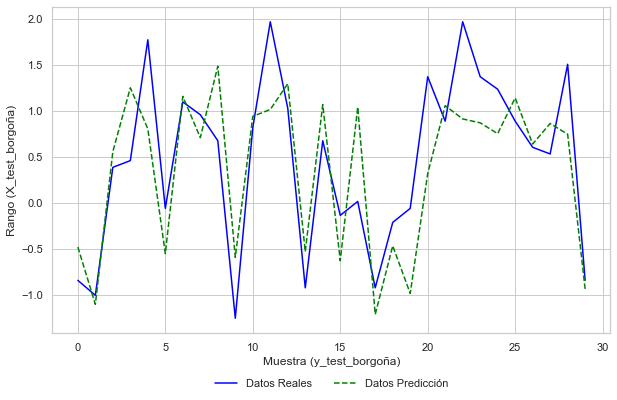

In [149]:
import matplotlib.pyplot as plt
# Estableciendo el tamaño de la figura
plt.rcParams['figure.figsize'] = (10, 6)
x_ax = range(len(X_test_borgoña))
# Graficando los datos observados y predichos
plt.plot(x_ax, y_test_borgoña, label='Datos Reales', color='blue', linestyle='-')
plt.plot(x_ax, y_pred_borgoña, label='Datos Predicción', color='green', linestyle='--')
plt.ylabel('Rango (X_test_borgoña)')
plt.xlabel('Muestra (y_test_borgoña)')
plt.legend(bbox_to_anchor=(0.5,-0.2), loc='lower center', ncol=10, frameon = False)
plt.show()  # Mostrar el gráfico

In [150]:
regressor.score(X_train_borgoña,y_train_borgoña)

0.898642329446568

# ENTRENAMIENTO 3

In [151]:
from sklearn.ensemble import RandomForestRegressor

# Crear el modelo de regresión aleatoria
rf_reg = RandomForestRegressor(random_state=91, n_estimators=91)

# Convertir y_train_borgoña a una matriz bidimensional
y_train_borgoña = y_train_borgoña.ravel()

# Entrenar el modelo con los datos de entrenamiento
regressor = rf_reg.fit(X_train_borgoña, y_train_borgoña)

# Realizar predicciones en los datos de prueba
y_pred_borgoña = regressor.predict(X_test_borgoña)

In [152]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# CALCULAR METRICAS DE RENDIMIENTO
mse = mean_squared_error(y_test_borgoña, y_pred_borgoña)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_borgoña, y_pred_borgoña)

print("Mean Squared Error (MSE):", mse)
print ("Root Mean Squared Error (RMSE):" , rmse)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 0.33040659461254995
Root Mean Squared Error (RMSE): 0.5748100508972942
R-squared (R2) Score: 0.6046801794730277


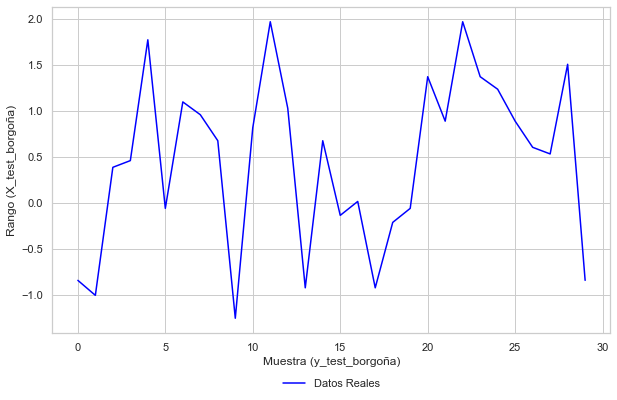

In [153]:
import matplotlib.pyplot as plt
# Estableciendo el tamaño de la figura
plt.rcParams['figure.figsize'] = (10, 6)
x_ax = range(len(X_test_borgoña))
# Graficando los datos observados y predichos
plt.plot(x_ax, y_test_borgoña, label='Datos Reales', color='blue', linestyle='-')
plt.ylabel('Rango (X_test_borgoña)')
plt.xlabel('Muestra (y_test_borgoña)')
plt.legend(bbox_to_anchor=(0.5,-0.2), loc='lower center', ncol=10, frameon = False)
plt.show()  # Mostrar el gráfico

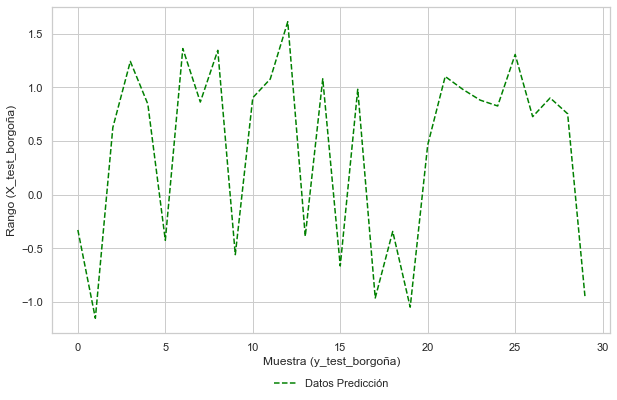

In [154]:
import matplotlib.pyplot as plt
# Estableciendo el tamaño de la figura
plt.rcParams['figure.figsize'] = (10, 6)
x_ax = range(len(X_test_borgoña))
# Graficando los datos observados y predichos
plt.plot(x_ax, y_pred_borgoña, label='Datos Predicción', color='green', linestyle='--')
plt.ylabel('Rango (X_test_borgoña)')
plt.xlabel('Muestra (y_test_borgoña)')
plt.legend(bbox_to_anchor=(0.5,-0.2), loc='lower center', ncol=10, frameon = False)
plt.show()  # Mostrar el gráfico

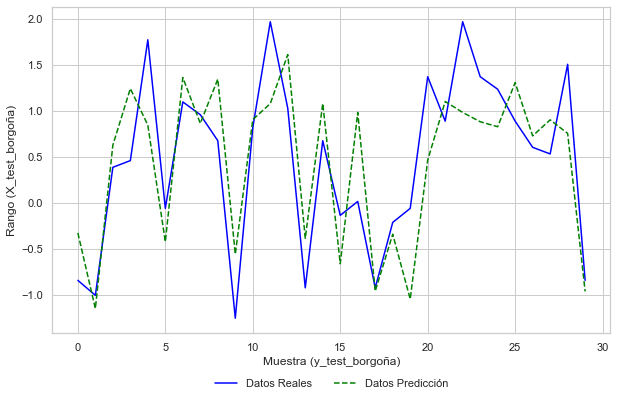

In [155]:
import matplotlib.pyplot as plt
# Estableciendo el tamaño de la figura
plt.rcParams['figure.figsize'] = (10, 6)
x_ax = range(len(X_test_borgoña))
# Graficando los datos observados y predichos
plt.plot(x_ax, y_test_borgoña, label='Datos Reales', color='blue', linestyle='-')
plt.plot(x_ax, y_pred_borgoña, label='Datos Predicción', color='green', linestyle='--')
plt.ylabel('Rango (X_test_borgoña)')
plt.xlabel('Muestra (y_test_borgoña)')
plt.legend(bbox_to_anchor=(0.5,-0.2), loc='lower center', ncol=10, frameon = False)
plt.show()  # Mostrar el gráfico

In [156]:
regressor.score(X_train_borgoña,y_train_borgoña)

0.9286218258447658

# RESULTADOS

In [157]:
import pandas as pd

# Tabla completa
dataResultado = {
    'Tipo Uva': ['Italia', 'Italia', 'Italia', 'Italia', 'Italia', 'Italia', 'Borgoña', 'Borgoña', 'Borgoña', 'Borgoña', 'Borgoña', 'Borgoña'],
    'Modelos IA': ['LR', 'LR', 'LR', 'RF', 'RF', 'RF', 'LR', 'LR', 'LR', 'RF', 'RF', 'RF'],
    'Entrenamiento': [1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3],
    'MSE': [0.051, 0.054, 0.051, 0.756, 0.545, 0.305, 0.075, 0.068, 0.064, 0.366, 0.341, 0.33],
    'RMSE': [0.226, 0.233, 0.225, 0.869, 0.738, 0.552, 0.274, 0.261, 0.253, 0.605, 0.584, 0.575],
    'R2': [0.372, 0.365, 0.185, 0.364, 0.541, 0.743, 0.503, 0.324, 0.301, 0.562, 0.592, 0.605],
    'Precisión Modelo': ['0.571 - 57%', '0.578 - 58%', '0.602 - 60%', '0.570 - 57%', '0.806 - 81%', '0.917 - 92%', '0.700 - 70%', '0.720 - 72%', '0.725 - 73%', '0.831 - 83%', '0.899 - 90%', '0.929 - 93%']
}

# Crear un DataFrame con los datos
df = pd.DataFrame(dataResultado)

# Mostrar el DataFrame
print(df)

   Tipo Uva Modelos IA  Entrenamiento    MSE   RMSE     R2 Precisión Modelo
0    Italia         LR              1  0.051  0.226  0.372      0.571 - 57%
1    Italia         LR              2  0.054  0.233  0.365      0.578 - 58%
2    Italia         LR              3  0.051  0.225  0.185      0.602 - 60%
3    Italia         RF              1  0.756  0.869  0.364      0.570 - 57%
4    Italia         RF              2  0.545  0.738  0.541      0.806 - 81%
5    Italia         RF              3  0.305  0.552  0.743      0.917 - 92%
6   Borgoña         LR              1  0.075  0.274  0.503      0.700 - 70%
7   Borgoña         LR              2  0.068  0.261  0.324      0.720 - 72%
8   Borgoña         LR              3  0.064  0.253  0.301      0.725 - 73%
9   Borgoña         RF              1  0.366  0.605  0.562      0.831 - 83%
10  Borgoña         RF              2  0.341  0.584  0.592      0.899 - 90%
11  Borgoña         RF              3  0.330  0.575  0.605      0.929 - 93%


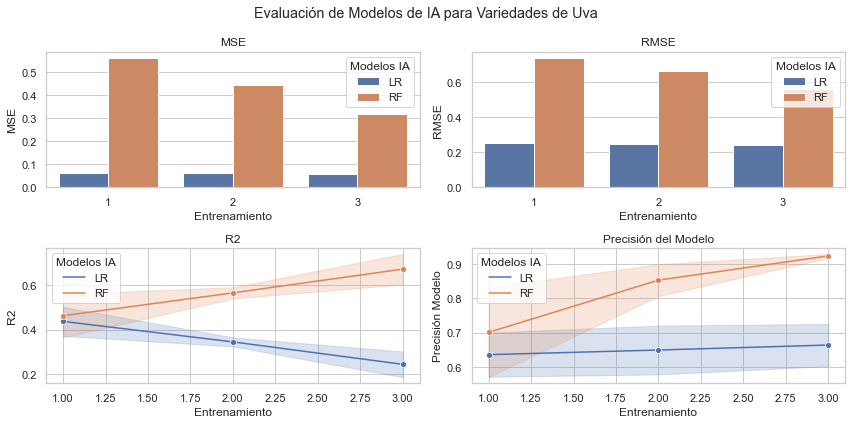

In [158]:
# Crear un DataFrame con los datos
dataResultado = {
    'Tipo Uva': ['Italia']*6 + ['Borgoña']*6,
    'Modelos IA': ['LR']*3 + ['RF']*3 + ['LR']*3 + ['RF']*3,
    'Entrenamiento': [1, 2, 3, 1, 2, 3] * 2,
    'MSE': [0.051, 0.054, 0.051, 0.756, 0.545, 0.305, 0.075, 0.068, 0.064, 0.366, 0.341, 0.33],
    'RMSE': [0.226, 0.233, 0.225, 0.869, 0.738, 0.552, 0.274, 0.261, 0.253, 0.605, 0.584, 0.575],
    'R2': [0.372, 0.365, 0.185, 0.364, 0.541, 0.743, 0.503, 0.324, 0.301, 0.562, 0.592, 0.605],
    'Precisión Modelo': [0.571, 0.578, 0.602, 0.57, 0.806, 0.917, 0.7, 0.72, 0.725, 0.831, 0.899, 0.929]
}

df = pd.DataFrame(dataResultado)

# Configurar el estilo de seaborn
sns.set(style="whitegrid")

# Gráfico de barras para MSE
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.barplot(x='Entrenamiento', y='MSE', hue='Modelos IA', data=df, ci=None)
plt.title('MSE')

# Gráfico de barras para RMSE
plt.subplot(2, 2, 2)
sns.barplot(x='Entrenamiento', y='RMSE', hue='Modelos IA', data=df, ci=None)
plt.title('RMSE')

# Gráfico de líneas para R2
plt.subplot(2, 2, 3)
sns.lineplot(x='Entrenamiento', y='R2', hue='Modelos IA', data=df, marker='o')
plt.title('R2')

# Gráfico de líneas para Precisión del Modelo
plt.subplot(2, 2, 4)
sns.lineplot(x='Entrenamiento', y='Precisión Modelo', hue='Modelos IA', data=df, marker='o')
plt.title('Precisión del Modelo')

# Agregar título al gráfico
plt.suptitle("Evaluación de Modelos de IA para Variedades de Uva")

plt.tight_layout()
plt.show()

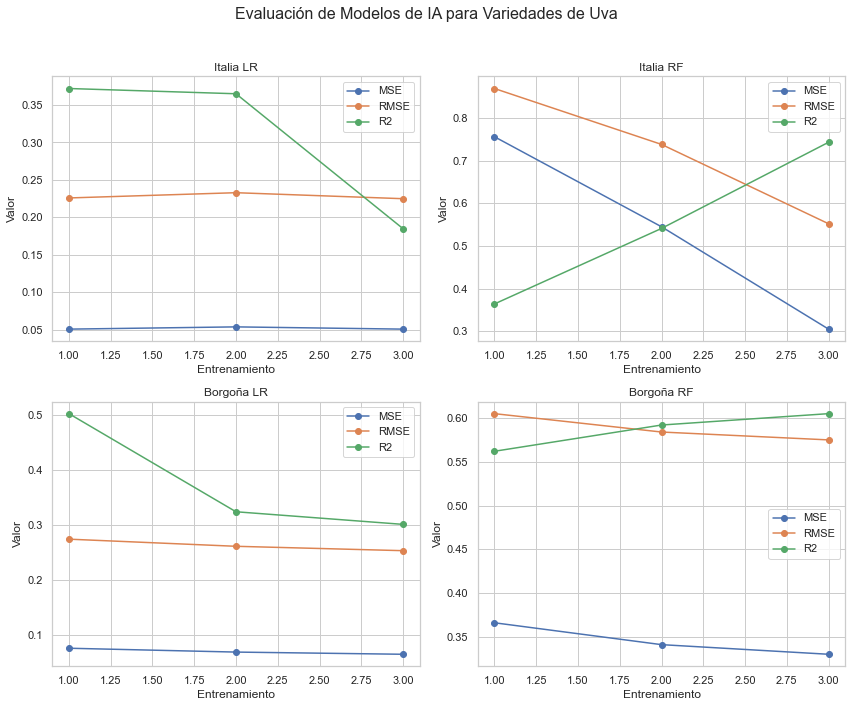

In [160]:
# Datos
dataResultado = {
    'Italia LR': {
        'Entrenamiento': [1, 2, 3],
        'MSE': [0.051, 0.054, 0.051],
        'RMSE': [0.226, 0.233, 0.225],
        'R2': [0.372, 0.365, 0.185],
        'Precision': [57, 58, 60]
    },
    'Italia RF': {
        'Entrenamiento': [1, 2, 3],
        'MSE': [0.756, 0.545, 0.305],
        'RMSE': [0.869, 0.738, 0.552],
        'R2': [0.364, 0.541, 0.743],
        'Precision': [57, 81, 92]
    },
    'Borgoña LR': {
        'Entrenamiento': [1, 2, 3],
        'MSE': [0.075, 0.068, 0.064],
        'RMSE': [0.274, 0.261, 0.253],
        'R2': [0.503, 0.324, 0.301],
        'Precision': [70, 72, 73]
    },
    'Borgoña RF': {
        'Entrenamiento': [1, 2, 3],
        'MSE': [0.366, 0.341, 0.33],
        'RMSE': [0.605, 0.584, 0.575],
        'R2': [0.562, 0.592, 0.605],
        'Precision': [83, 90, 93]
    }
}

# Crear subgráficos
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Evaluación de Modelos de IA para Variedades de Uva', fontsize=16)

# Configurar los subgráficos
for i, (tipo_uva, metrics) in enumerate(dataResultado.items()):
    row = i // 2
    col = i % 2
    x = metrics['Entrenamiento']

    axs[row, col].plot(x, metrics['MSE'], marker='o', label='MSE')
    axs[row, col].plot(x, metrics['RMSE'], marker='o', label='RMSE')
    axs[row, col].plot(x, metrics['R2'], marker='o', label='R2')

    axs[row, col].set_title(tipo_uva)
    axs[row, col].set_xlabel('Entrenamiento')
    axs[row, col].set_ylabel('Valor')
    axs[row, col].legend()

# Ajustar diseño y mostrar el gráfico
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

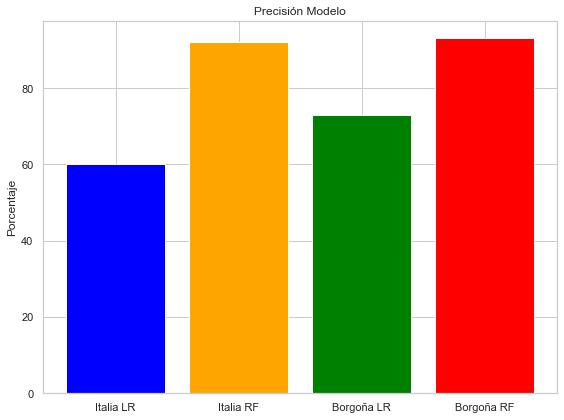

In [162]:
# Datos
dataResultado = {
    'Italia LR': {
        'Entrenamiento': [1, 2, 3],
        'MSE': [0.051, 0.054, 0.051],
        'RMSE': [0.226, 0.233, 0.225],
        'R2': [0.372, 0.365, 0.185],
        'Precision': [57, 58, 60]
    },
    'Italia RF': {
        'Entrenamiento': [1, 2, 3],
        'MSE': [0.756, 0.545, 0.305],
        'RMSE': [0.869, 0.738, 0.552],
        'R2': [0.364, 0.541, 0.743],
        'Precision': [57, 81, 92]
    },
    'Borgoña LR': {
        'Entrenamiento': [1, 2, 3],
        'MSE': [0.075, 0.068, 0.064],
        'RMSE': [0.274, 0.261, 0.253],
        'R2': [0.503, 0.324, 0.301],
        'Precision': [70, 72, 73]
    },
    'Borgoña RF': {
        'Entrenamiento': [1, 2, 3],
        'MSE': [0.366, 0.341, 0.33],
        'RMSE': [0.605, 0.584, 0.575],
        'R2': [0.562, 0.592, 0.605],
        'Precision': [83, 90, 93]
    }
}

# Crear subgráfico solo para la Precisión del último entrenamiento
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(dataResultado.keys(), [metrics['Precision'][-1] for metrics in dataResultado.values()], color=['blue', 'orange', 'green', 'red'])
ax.set_title('Precisión Modelo')
ax.set_ylabel('Porcentaje')

# Ajustar diseño y mostrar el gráfico
plt.tight_layout()
plt.show()

# UVA ITALIA

In [163]:
# Uva Italia
dataResultadoItalia = {
    'Tipo Uva': ['Italia', 'Italia', 'Italia', 'Italia', 'Italia', 'Italia'],
    'Modelos IA': ['LR', 'LR', 'LR', 'RF', 'RF', 'RF'],
    'Entrenamiento': [1, 2, 3, 1, 2, 3],
    'MSE': [0.051, 0.054, 0.051, 0.756, 0.545, 0.305],
    'RMSE': [0.226, 0.233, 0.225, 0.869, 0.738, 0.552],
    'R2': [0.372, 0.365, 0.185, 0.364, 0.541, 0.743],
    'Precisión Modelo': ['0.571 - 57%', '0.578 - 58%', '0.602 - 60%', '0.570 - 57%', '0.806 - 81%', '0.917 - 92%']
}

# Crear un DataFrame con los datos
df = pd.DataFrame(dataResultadoItalia)

# Mostrar el DataFrame
print(df)

  Tipo Uva Modelos IA  Entrenamiento    MSE   RMSE     R2 Precisión Modelo
0   Italia         LR              1  0.051  0.226  0.372      0.571 - 57%
1   Italia         LR              2  0.054  0.233  0.365      0.578 - 58%
2   Italia         LR              3  0.051  0.225  0.185      0.602 - 60%
3   Italia         RF              1  0.756  0.869  0.364      0.570 - 57%
4   Italia         RF              2  0.545  0.738  0.541      0.806 - 81%
5   Italia         RF              3  0.305  0.552  0.743      0.917 - 92%


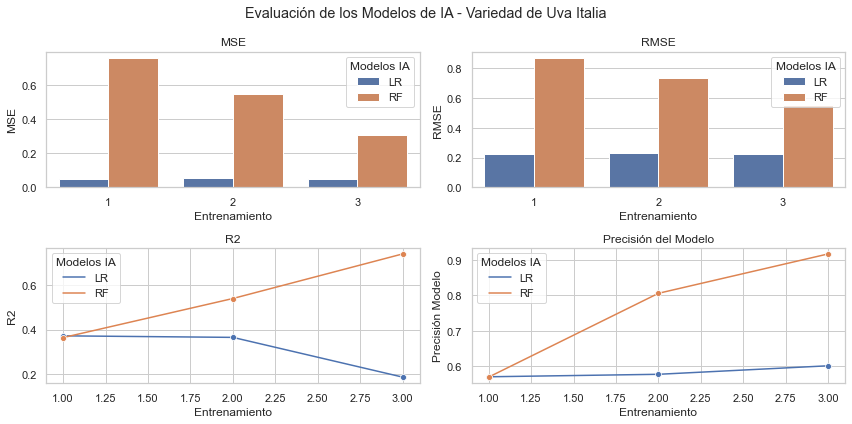

In [164]:
# Crear un DataFrame con los datos
dataResultadoItalia = {
    'Tipo Uva': ['Italia']*6,
    'Modelos IA': ['LR']*3 + ['RF']*3,
    'Entrenamiento': [1, 2, 3, 1, 2, 3],
    'MSE': [0.051, 0.054, 0.051, 0.756, 0.545, 0.305],
    'RMSE': [0.226, 0.233, 0.225, 0.869, 0.738, 0.552],
    'R2': [0.372, 0.365, 0.185, 0.364, 0.541, 0.743],
    'Precisión Modelo': [0.571, 0.578, 0.602, 0.57, 0.806, 0.917]
}

df = pd.DataFrame(dataResultadoItalia)

# Configurar el estilo de seaborn
sns.set(style="whitegrid")

# Gráfico de barras para MSE
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.barplot(x='Entrenamiento', y='MSE', hue='Modelos IA', data=df, ci=None)
plt.title('MSE')

# Gráfico de barras para RMSE
plt.subplot(2, 2, 2)
sns.barplot(x='Entrenamiento', y='RMSE', hue='Modelos IA', data=df, ci=None)
plt.title('RMSE')

# Gráfico de líneas para R2
plt.subplot(2, 2, 3)
sns.lineplot(x='Entrenamiento', y='R2', hue='Modelos IA', data=df, marker='o')
plt.title('R2')

# Gráfico de líneas para Precisión del Modelo
plt.subplot(2, 2, 4)
sns.lineplot(x='Entrenamiento', y='Precisión Modelo', hue='Modelos IA', data=df, marker='o')
plt.title('Precisión del Modelo')

# Agregar título al gráfico
plt.suptitle("Evaluación de los Modelos de IA - Variedad de Uva Italia")

plt.tight_layout()
plt.show()

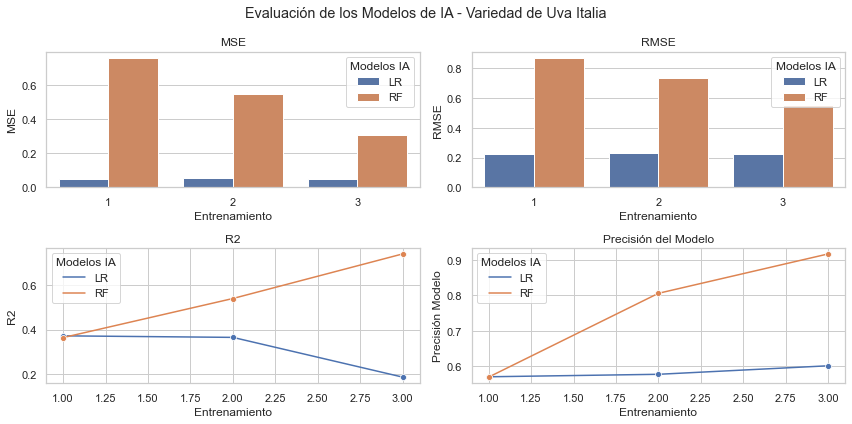

In [165]:
# Crear un DataFrame con los datos
dataResultadoItalia = {
    'Tipo Uva': ['Italia']*6,
    'Modelos IA': ['LR']*3 + ['RF']*3,
    'Entrenamiento': [1, 2, 3, 1, 2, 3],
    'MSE': [0.051, 0.054, 0.051, 0.756, 0.545, 0.305],
    'RMSE': [0.226, 0.233, 0.225, 0.869, 0.738, 0.552],
    'R2': [0.372, 0.365, 0.185, 0.364, 0.541, 0.743],
    'Precisión Modelo': [0.571, 0.578, 0.602, 0.57, 0.806, 0.917]
}

df = pd.DataFrame(dataResultadoItalia)

# Configurar el estilo de seaborn
sns.set(style="whitegrid")

# Gráfico de barras para MSE
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.barplot(x='Entrenamiento', y='MSE', hue='Modelos IA', data=df, ci=None)
plt.title('MSE')

# Gráfico de barras para RMSE
plt.subplot(2, 2, 2)
sns.barplot(x='Entrenamiento', y='RMSE', hue='Modelos IA', data=df, ci=None)
plt.title('RMSE')

# Gráfico de líneas para R2
plt.subplot(2, 2, 3)
sns.lineplot(x='Entrenamiento', y='R2', hue='Modelos IA', data=df, marker='o')
plt.title('R2')

# Gráfico de líneas para Precisión del Modelo
plt.subplot(2, 2, 4)
sns.lineplot(x='Entrenamiento', y='Precisión Modelo', hue='Modelos IA', data=df, marker='o')
plt.title('Precisión del Modelo')

# Agregar título al gráfico
plt.suptitle("Evaluación de los Modelos de IA - Variedad de Uva Italia")

plt.tight_layout()
plt.show()

# UVA BORGOÑA 

In [166]:
# Uva Borgoña
dataResultadoBorgoña = {
    'Tipo Uva': ['Borgoña', 'Borgoña', 'Borgoña', 'Borgoña', 'Borgoña', 'Borgoña'],
    'Modelos IA': ['LR', 'LR', 'LR', 'RF', 'RF', 'RF'],
    'Entrenamiento': [1, 2, 3, 1, 2, 3],
    'MSE': [0.075, 0.068, 0.064, 0.366, 0.341, 0.33],
    'RMSE': [0.274, 0.261, 0.253, 0.605, 0.584, 0.575],
    'R2': [0.503, 0.324, 0.301, 0.562, 0.592, 0.605],
    'Precisión Modelo': ['0.700 - 70%', '0.720 - 72%', '0.725 - 73%', '0.831 - 83%', '0.899 - 90%', '0.929 - 93%']
}

# Crear un DataFrame con los datos
tabla = pd.DataFrame(dataResultadoBorgoña)

# Mostrar el DataFrame
print(tabla)

  Tipo Uva Modelos IA  Entrenamiento    MSE   RMSE     R2 Precisión Modelo
0  Borgoña         LR              1  0.075  0.274  0.503      0.700 - 70%
1  Borgoña         LR              2  0.068  0.261  0.324      0.720 - 72%
2  Borgoña         LR              3  0.064  0.253  0.301      0.725 - 73%
3  Borgoña         RF              1  0.366  0.605  0.562      0.831 - 83%
4  Borgoña         RF              2  0.341  0.584  0.592      0.899 - 90%
5  Borgoña         RF              3  0.330  0.575  0.605      0.929 - 93%


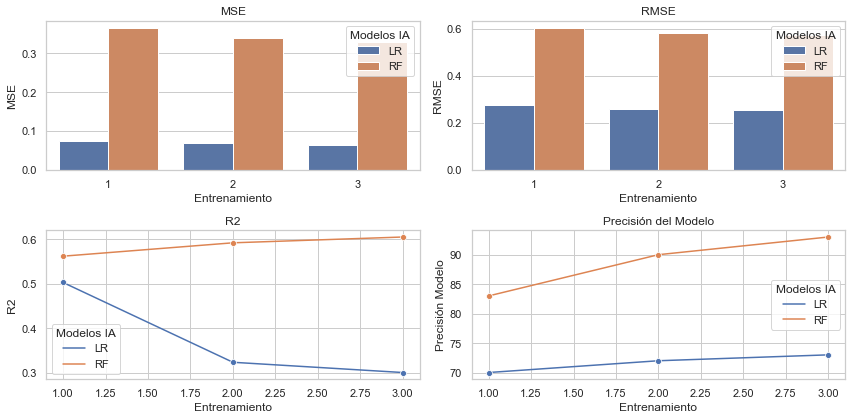

In [167]:
# Crear un DataFrame con los nuevos datos
data_borgona = {
    'Tipo Uva': ['Borgoña']*6,
    'Modelos IA': ['LR']*3 + ['RF']*3,
    'Entrenamiento': [1, 2, 3, 1, 2, 3],
    'MSE': [0.075, 0.068, 0.064, 0.366, 0.341, 0.33],
    'RMSE': [0.274, 0.261, 0.253, 0.605, 0.584, 0.575],
    'R2': [0.503, 0.324, 0.301, 0.562, 0.592, 0.605],
    'Precisión Modelo': [70, 72, 73, 83, 90, 93]
}

df_borgona = pd.DataFrame(data_borgona)

# Configurar el estilo de seaborn
sns.set(style="whitegrid")

# Gráfico de barras para MSE
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.barplot(x='Entrenamiento', y='MSE', hue='Modelos IA', data=df_borgona, ci=None)
plt.title('MSE')

# Gráfico de barras para RMSE
plt.subplot(2, 2, 2)
sns.barplot(x='Entrenamiento', y='RMSE', hue='Modelos IA', data=df_borgona, ci=None)
plt.title('RMSE')

# Gráfico de líneas para R2
plt.subplot(2, 2, 3)
sns.lineplot(x='Entrenamiento', y='R2', hue='Modelos IA', data=df_borgona, marker='o')
plt.title('R2')

# Gráfico de líneas para Precisión del Modelo
plt.subplot(2, 2, 4)
sns.lineplot(x='Entrenamiento', y='Precisión Modelo', hue='Modelos IA', data=df_borgona, marker='o')
plt.title('Precisión del Modelo')

plt.tight_layout()
plt.show()

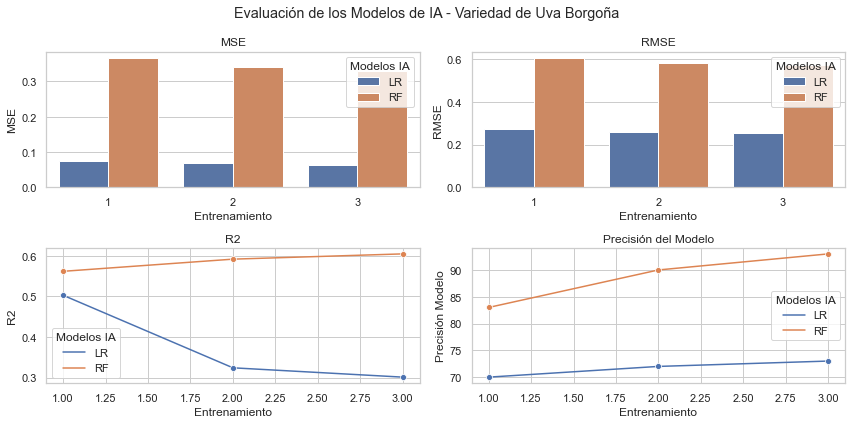

In [168]:
# Crear un DataFrame con los nuevos datos
data_borgona = {
    'Tipo Uva': ['Borgoña']*6,
    'Modelos IA': ['LR']*3 + ['RF']*3,
    'Entrenamiento': [1, 2, 3, 1, 2, 3],
    'MSE': [0.075, 0.068, 0.064, 0.366, 0.341, 0.33],
    'RMSE': [0.274, 0.261, 0.253, 0.605, 0.584, 0.575],
    'R2': [0.503, 0.324, 0.301, 0.562, 0.592, 0.605],
    'Precisión Modelo': [70, 72, 73, 83, 90, 93]
}

df_borgona = pd.DataFrame(data_borgona)

# Configurar el estilo de seaborn
sns.set(style="whitegrid")

# Gráfico de barras para MSE
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.barplot(x='Entrenamiento', y='MSE', hue='Modelos IA', data=df_borgona, ci=None)
plt.title('MSE')

# Gráfico de barras para RMSE
plt.subplot(2, 2, 2)
sns.barplot(x='Entrenamiento', y='RMSE', hue='Modelos IA', data=df_borgona, ci=None)
plt.title('RMSE')

# Gráfico de líneas para R2
plt.subplot(2, 2, 3)
sns.lineplot(x='Entrenamiento', y='R2', hue='Modelos IA', data=df_borgona, marker='o')
plt.title('R2')

# Gráfico de líneas para Precisión del Modelo
plt.subplot(2, 2, 4)
sns.lineplot(x='Entrenamiento', y='Precisión Modelo', hue='Modelos IA', data=df_borgona, marker='o')
plt.title('Precisión del Modelo')

# Agregar título al gráfico
plt.suptitle("Evaluación de los Modelos de IA - Variedad de Uva Borgoña")

plt.tight_layout()
plt.show()

# TABLA COMPLETO DE LO MEJORES MODELOS

In [169]:
# Crear un diccionario con los datos
dataCompletaModelos = {
    'Variedad de Uva': ['Italia', 'Italia', 'Borgoña', 'Borgoña'],
    'Modelos IA': ['LR', 'RF', 'LR', 'RF'],
    'MSE': [0.051, 0.305, 0.064, 0.330],
    'RMSE': [0.225, 0.552, 0.253, 0.575],
    'R2': [0.185, 0.743, 0.301, 0.605],
    'Precisión del Modelo': ['60% = Insatisfactorio', '92% = Satisfactorio', '73% = Insatisfactorio', '93% = Satisfactorio']
}

# Crear un DataFrame con los datos
df = pd.DataFrame(dataCompletaModelos)

# Mostrar el DataFrame
print(df)

  Variedad de Uva Modelos IA    MSE   RMSE     R2   Precisión del Modelo
0          Italia         LR  0.051  0.225  0.185  60% = Insatisfactorio
1          Italia         RF  0.305  0.552  0.743    92% = Satisfactorio
2         Borgoña         LR  0.064  0.253  0.301  73% = Insatisfactorio
3         Borgoña         RF  0.330  0.575  0.605    93% = Satisfactorio


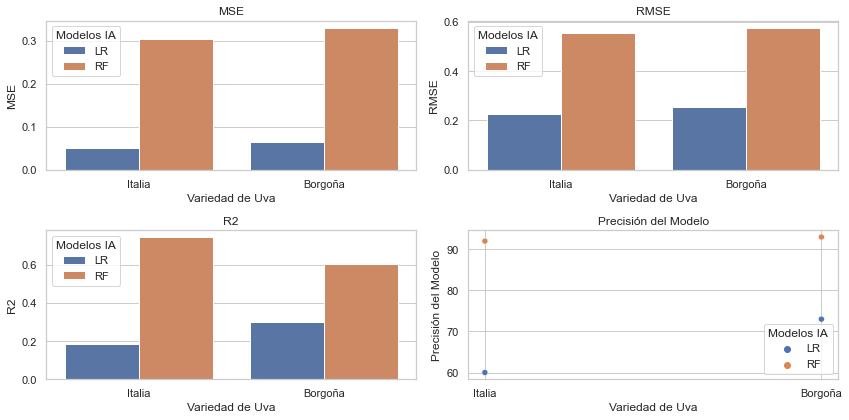

In [170]:
# Crear un DataFrame con los datos
dataCompletaModelos = {
    'Variedad de Uva': ['Italia', 'Italia', 'Borgoña', 'Borgoña'],
    'Modelos IA': ['LR', 'RF', 'LR', 'RF'],
    'MSE': [0.051, 0.305, 0.064, 0.33],
    'RMSE': [0.225, 0.552, 0.253, 0.575],
    'R2': [0.185, 0.743, 0.301, 0.605],
    'Precisión del Modelo': [60, 92, 73, 93]
}

df = pd.DataFrame(dataCompletaModelos)

# Configurar el estilo de seaborn
sns.set(style="whitegrid")

# Gráfico de barras para MSE
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.barplot(x='Variedad de Uva', y='MSE', hue='Modelos IA', data=df)
plt.title('MSE')

# Gráfico de barras para RMSE
plt.subplot(2, 2, 2)
sns.barplot(x='Variedad de Uva', y='RMSE', hue='Modelos IA', data=df)
plt.title('RMSE')

# Gráfico de barras para R2
plt.subplot(2, 2, 3)
sns.barplot(x='Variedad de Uva', y='R2', hue='Modelos IA', data=df)
plt.title('R2')

# Gráfico de dispersión para Precisión del Modelo
plt.subplot(2, 2, 4)
sns.scatterplot(x='Variedad de Uva', y='Precisión del Modelo', hue='Modelos IA', data=df)
plt.title('Precisión del Modelo')

plt.tight_layout()
plt.show()

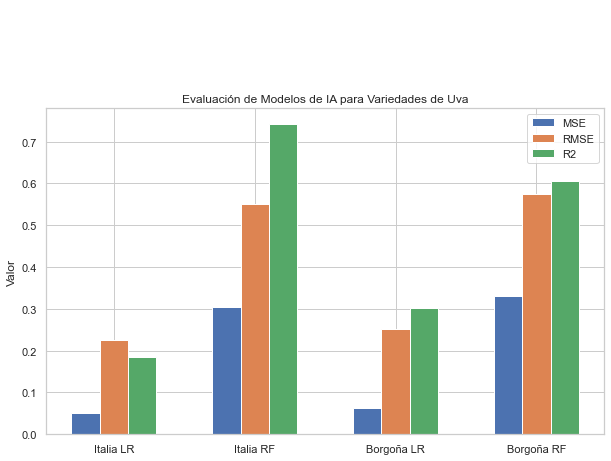

In [172]:
# Datos
variedades = ['Italia LR', 'Italia RF', 'Borgoña LR', 'Borgoña RF']
mse = [0.051, 0.305, 0.064, 0.330]
rmse = [0.225, 0.552, 0.253, 0.575]
r2 = [0.185, 0.743, 0.301, 0.605]
precision = [60, 92, 73, 93]

# Crear figuras y ejes
fig, ax = plt.subplots(figsize=(10, 6))

# Barra para MSE
ax.bar(np.arange(len(variedades)), mse, width=0.2, label='MSE')

# Barra para RMSE
ax.bar(np.arange(len(variedades)) + 0.2, rmse, width=0.2, label='RMSE')

# Barra para R2
ax.bar(np.arange(len(variedades)) + 0.4, r2, width=0.2, label='R2')

# Configuración de ejes y etiquetas
ax.set_xticks(np.arange(len(variedades)) + 0.2)
ax.set_xticklabels(variedades)
ax.set_ylabel('Valor')
ax.set_title('Evaluación de Modelos de IA para Variedades de Uva')
ax.legend()

# Añadir etiquetas con precisión del modelo
for i, prec in enumerate(precision):
    ax.text(i, 1, f'{prec}%', ha='center', va='bottom', color='white')

# Mostrar el gráfico
plt.show()